<center> <h1>MSDS 7331 - Project 3</h1> </center>
<center> <h1>Johnson Ekedum, Ekaterina Pirogova, Victor Yim</h1> </center>
<center> <h2>12/03/2017</h2> </center>
<center> <h1></h1> </center>

## Business understanding<br>
Porto Seguro is an insurance company located in Brazil.  It is the third insurance companies in that country.  It offers auto, home, health, life and business insurance products to the customers.  Due to the competitive natural of this business, Porto Seguro has to ensure that all potential and existing customers are getting the best price based on their insurance need.  For Porto Seguro, this also means it has to assess the risk of each insurance policy and predicting the claim likelihood to derive premium on each claim to ensure profitability.  Any inaccuracy of the premium may either cost lower risk customers to pay higher premium. This could potentially lose the customers to competitors.  More critically, this may impact the higher risk policy to pay less, which could result in impacting the profitability of the company. 
For this project, the evaluation is on auto insurance claims.   Porto Seguro has collected data on their customers.  
The goals of this analysis:
 - build a model to predict whether the customers will make a claim based on previous claim history.  
 - Provide insight into the customers using various classification analysis



## Data understanding<br>
Porto Seguro provided a dataset of 595,212 observations with 59 features.   All features are masked with generic feature names to their actual meaning behind the numbers.  From the analysis, we can see that there are 23 indicator variables with 0 and 1.  The variable names fall into three distinct buckets with prefix of Ps_ind, Ps_car and Ps_Calc.  Our assumption is that Ps_Ind are likely attributes on the drivers such as gender, marital status, student and etc.  Ps_car are most like the features of the vehicle being insured such as availability rearview camera, airbag protection, collusion sensors and etc.   And the Ps_calc could potential be any combination of features that have been derived by Porto Seguro. Other than the indicator variables, the remaining variables also have the same prefix naming convention.  They are mostly categorical nominal variables with various levels.  These variables could vary for the actual meaning such as age bracket of the vehicles or individual, mileage of the car, type of auto and etc.  


In [2]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import pylab
from pandas import Categorical
from sklearn.datasets import make_classification
import sklearn
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_regression
from sklearn.datasets import make_classification
from sklearn import metrics as mt
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas.tools.plotting import boxplot
from sklearn.metrics import mean_squared_error
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [3]:
#upload dataset
drivers=pd.read_csv('C:/Users/Victor Yim/Documents/Data/PortoSeguro/train.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drivers.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.257033       0.163921       0.185304       0.000373   
std         0.436998       0.370205       0.388544       0.019309   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin      ps_ind_14  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.001692       0.009439       0.000948       0.012451   
std         0.041097       0.096693       0.030768       0.127545   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

           ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        7.299922       0.660823       0.121081       0.153446   
std         3.546042       0.473430       0.326222       0.360417   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         7.000000       1.000000       0.000000       0.000000   
75%        10.000000       1.000000       0.000000       0.000000   
max        13.000000       1.000000       1.000000       1.000000   

           ps_reg_01      ps_reg_02      ps_reg_03  ps_car_01_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       8.295933   
std         0.287643       0.404264       0.793506       2.508270   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       7.000000   
50%         0.700000       0.300000       0.720677       7.000000   
75%         0.900000       0.600000       1.000000      11.000000   
max         0.900000       1.800000       4.037945      11.000000   

       ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.829931      -0.504899       0.725192      -0.157732   
std         0.375716       0.788654       2.153463       0.844417   
min        -1.0000

### Let's check missing values

In [5]:
# Replace missing values to NaN
drivers = drivers.replace(to_replace=-1,value=np.nan)
#Percent of missing values in dataset
missVal=drivers.isnull().sum()*100/len(drivers)
missVal.iloc[missVal.nonzero()]

ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_reg_03        18.106490
ps_car_01_cat     0.017977
ps_car_02_cat     0.000840
ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_car_07_cat     1.930237
ps_car_09_cat     0.095596
ps_car_11         0.000840
ps_car_12         0.000168
ps_car_14         7.160474
dtype: float64

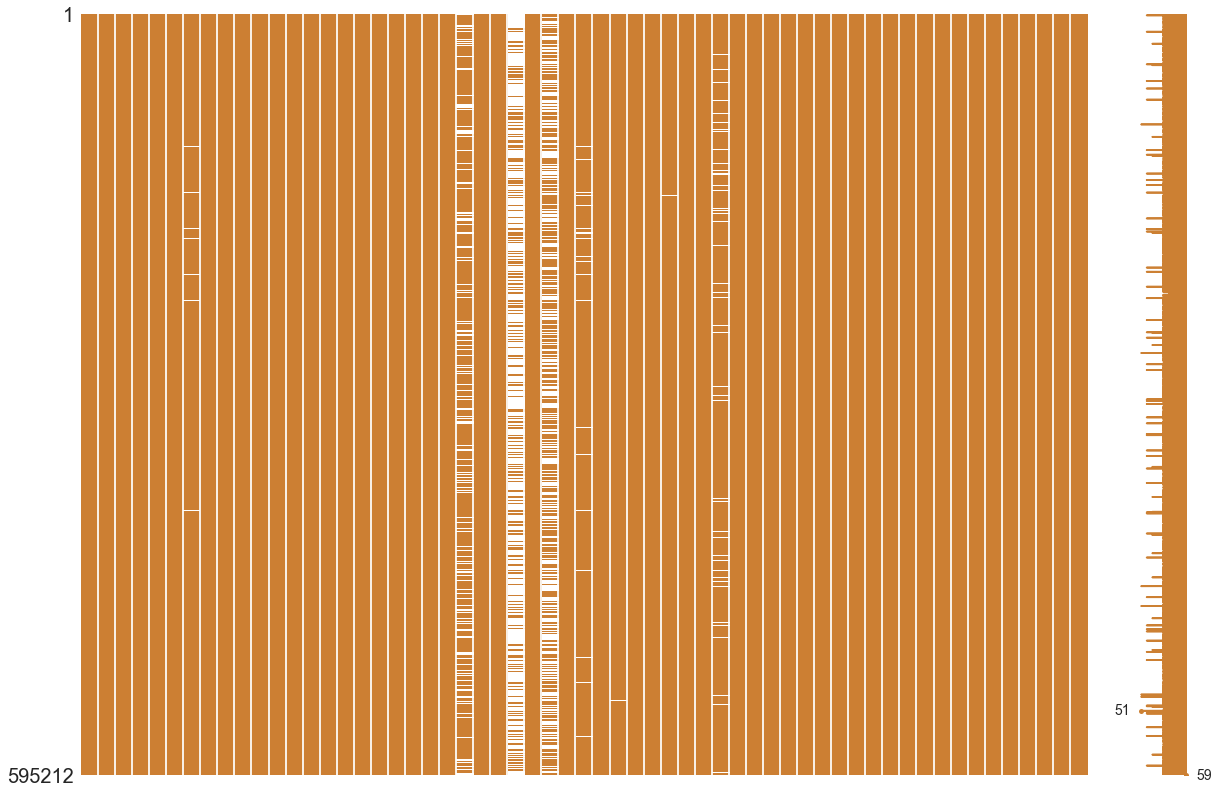

In [6]:
import missingno as msno

msno.matrix(df=drivers.iloc[:, :], figsize=(20, 14), color=(0.8, 0.5, 0.2))   

From the description to the data set we know that variables ending on "cat" or "bin" are categorical. And the rest either continuous or ordinal.<br>
From the visualizations below we can see that following variables are categorical :<br>
binary:<br>
<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_08_cat </span>

non-binary:<br>
<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_ind_02_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_04_cat, ps_car_06_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat </span>

We assume that following features are continuous because they have floating point number type with long tail of numbers after the point. The continuous features are:<br>
<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15 </span>

Ordinal features :<br>
<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_reg_01, ps_reg_02, ps_ind_01, ps_ind_03, ps_ind_14, ps_ind_15, ps_car_11, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,
ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14 </span>


### Let's have a look of what each variable represents:

#### target variable. 
This variable represents if the insurance claim was made.

col_0     Percent
target           
0       96.355248
1        3.644752

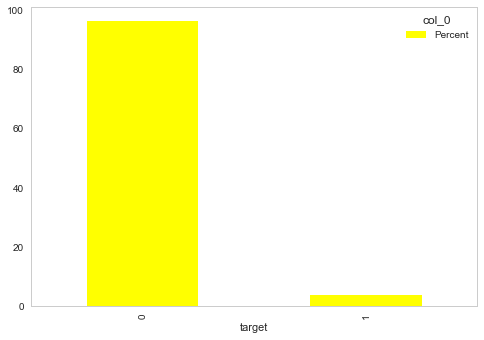

In [7]:
target_counts = pd.crosstab(index = drivers["target"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
target_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
target_counts

We can see that our variable is highly unbalanced.

### Plot binary variables

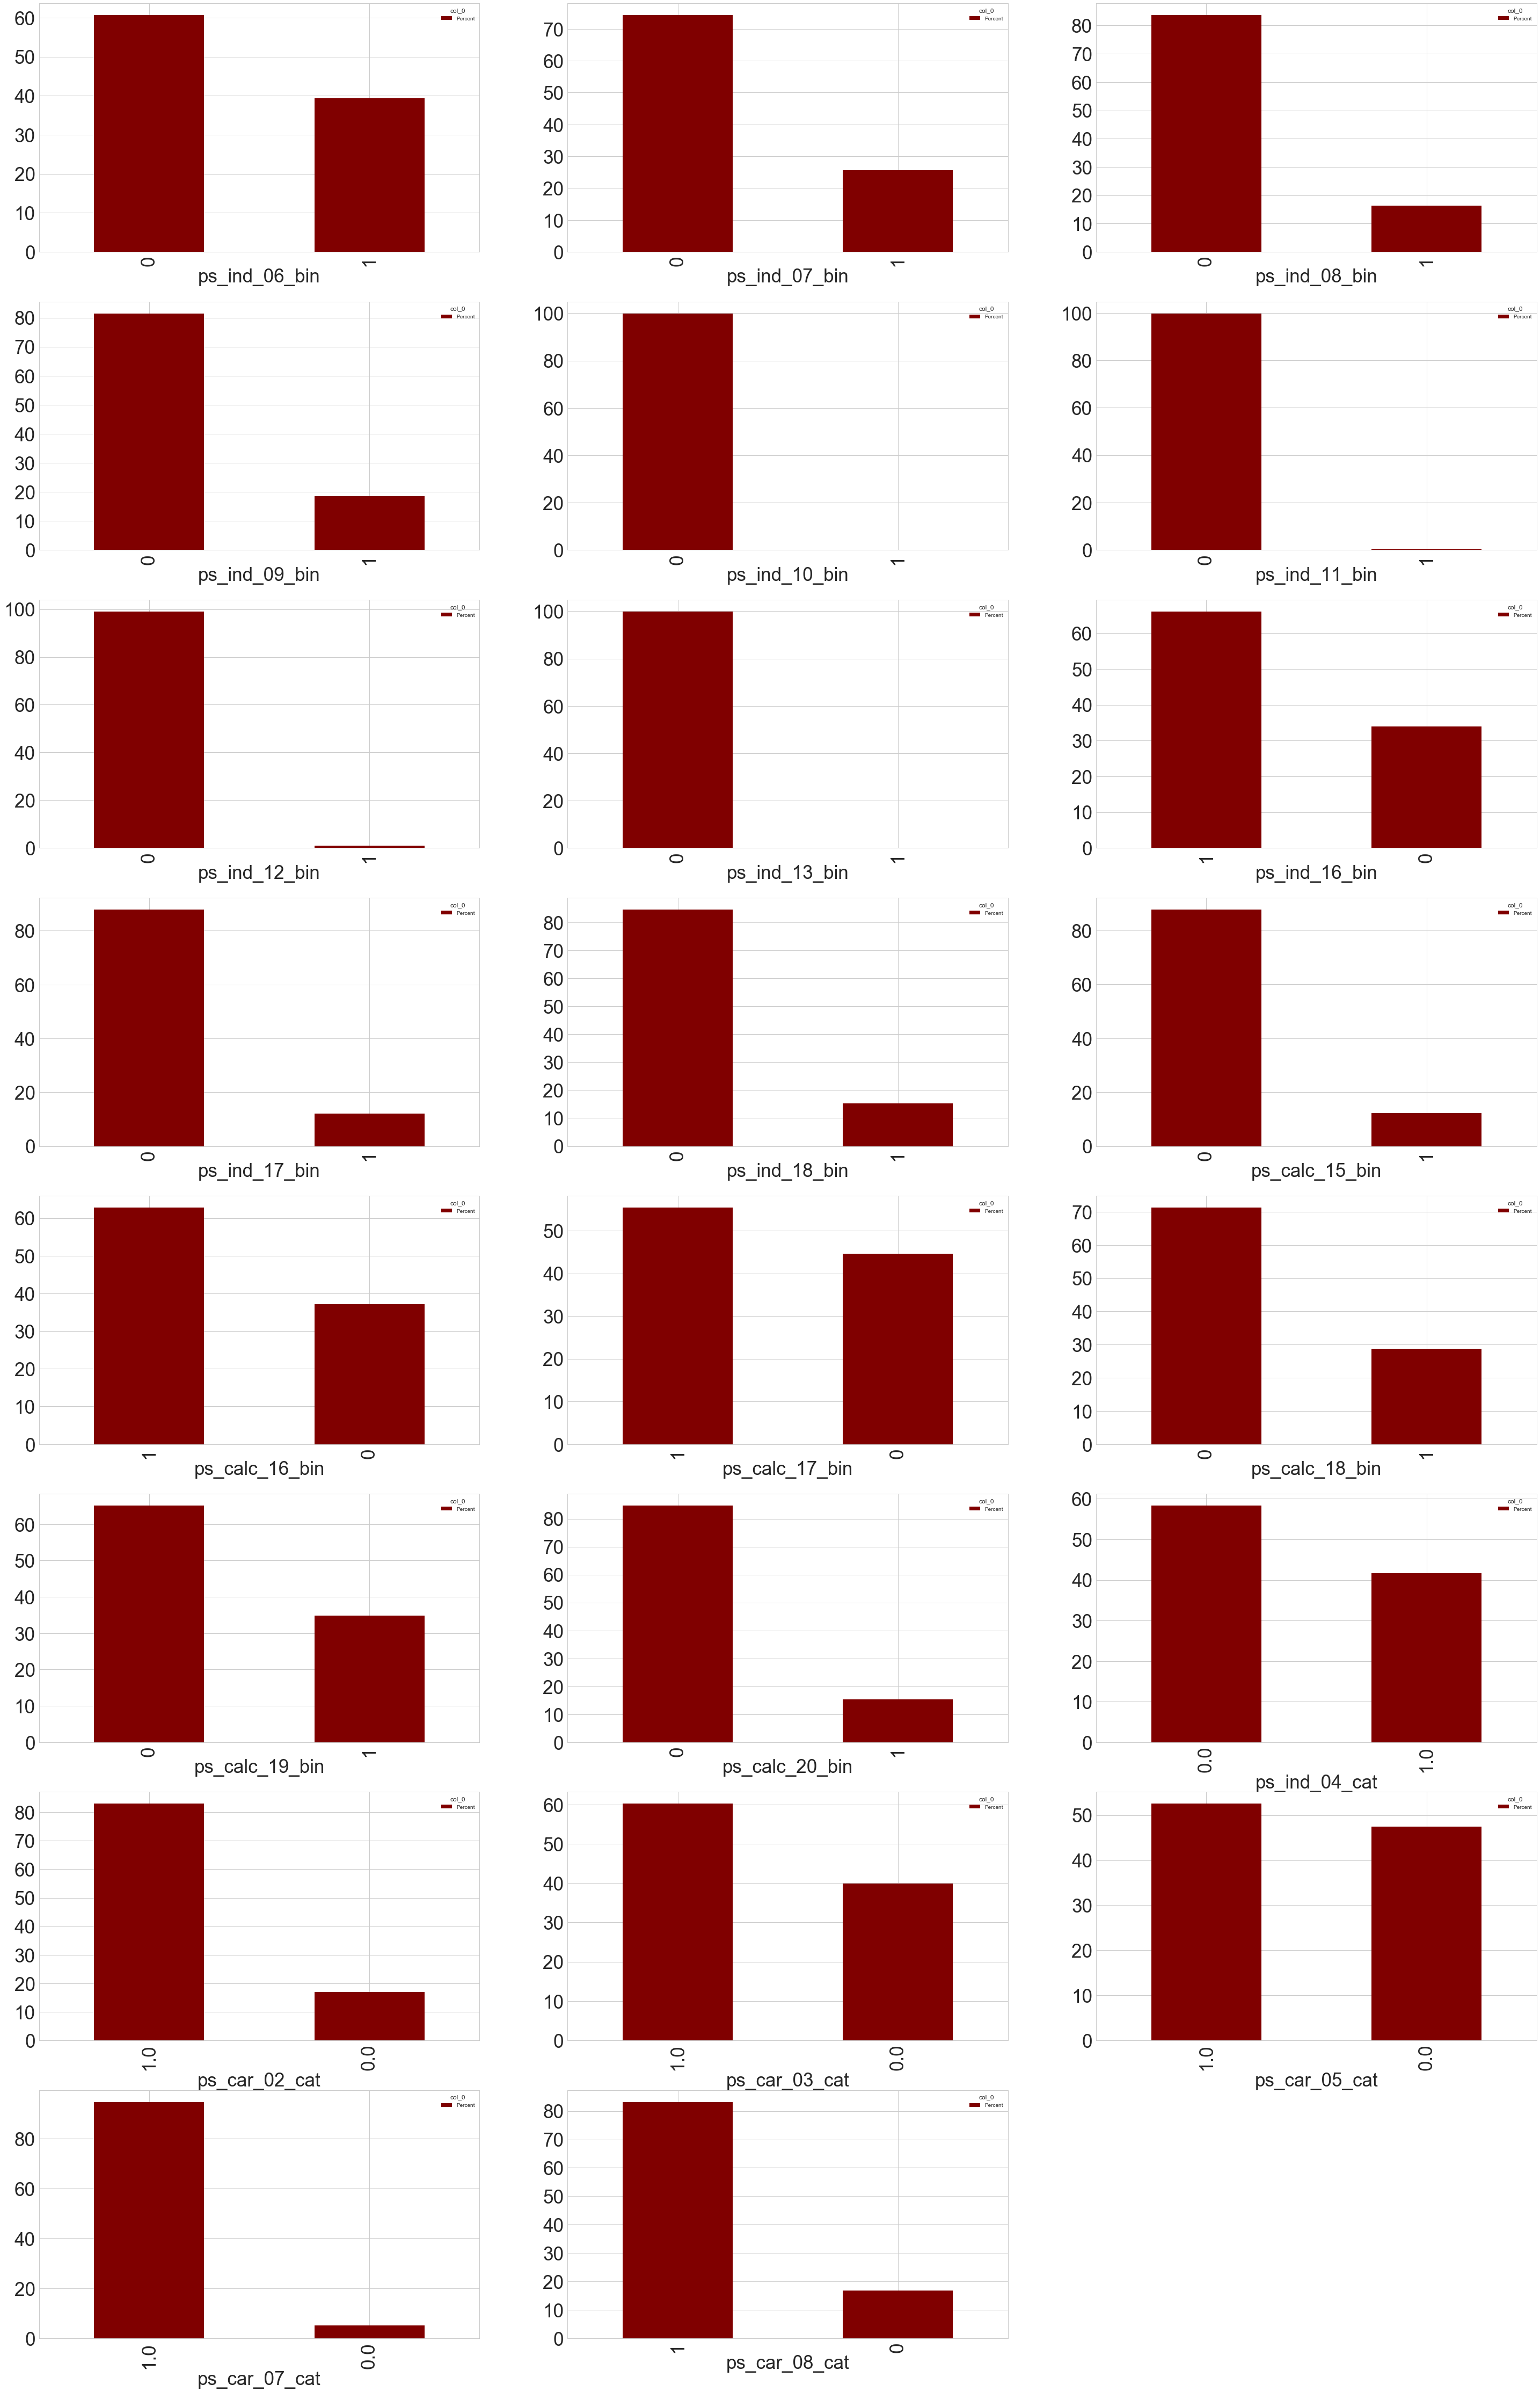

In [8]:
#plot binary variables
binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 
         'ps_car_07_cat', 'ps_car_08_cat']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)
    #print(counts)
plt.show()


We see that following variables are indeed binary. We can see that most of them are unbalanced and some of them extremely unbalanced.
Let's check the variation of target variable across levels of these variables.

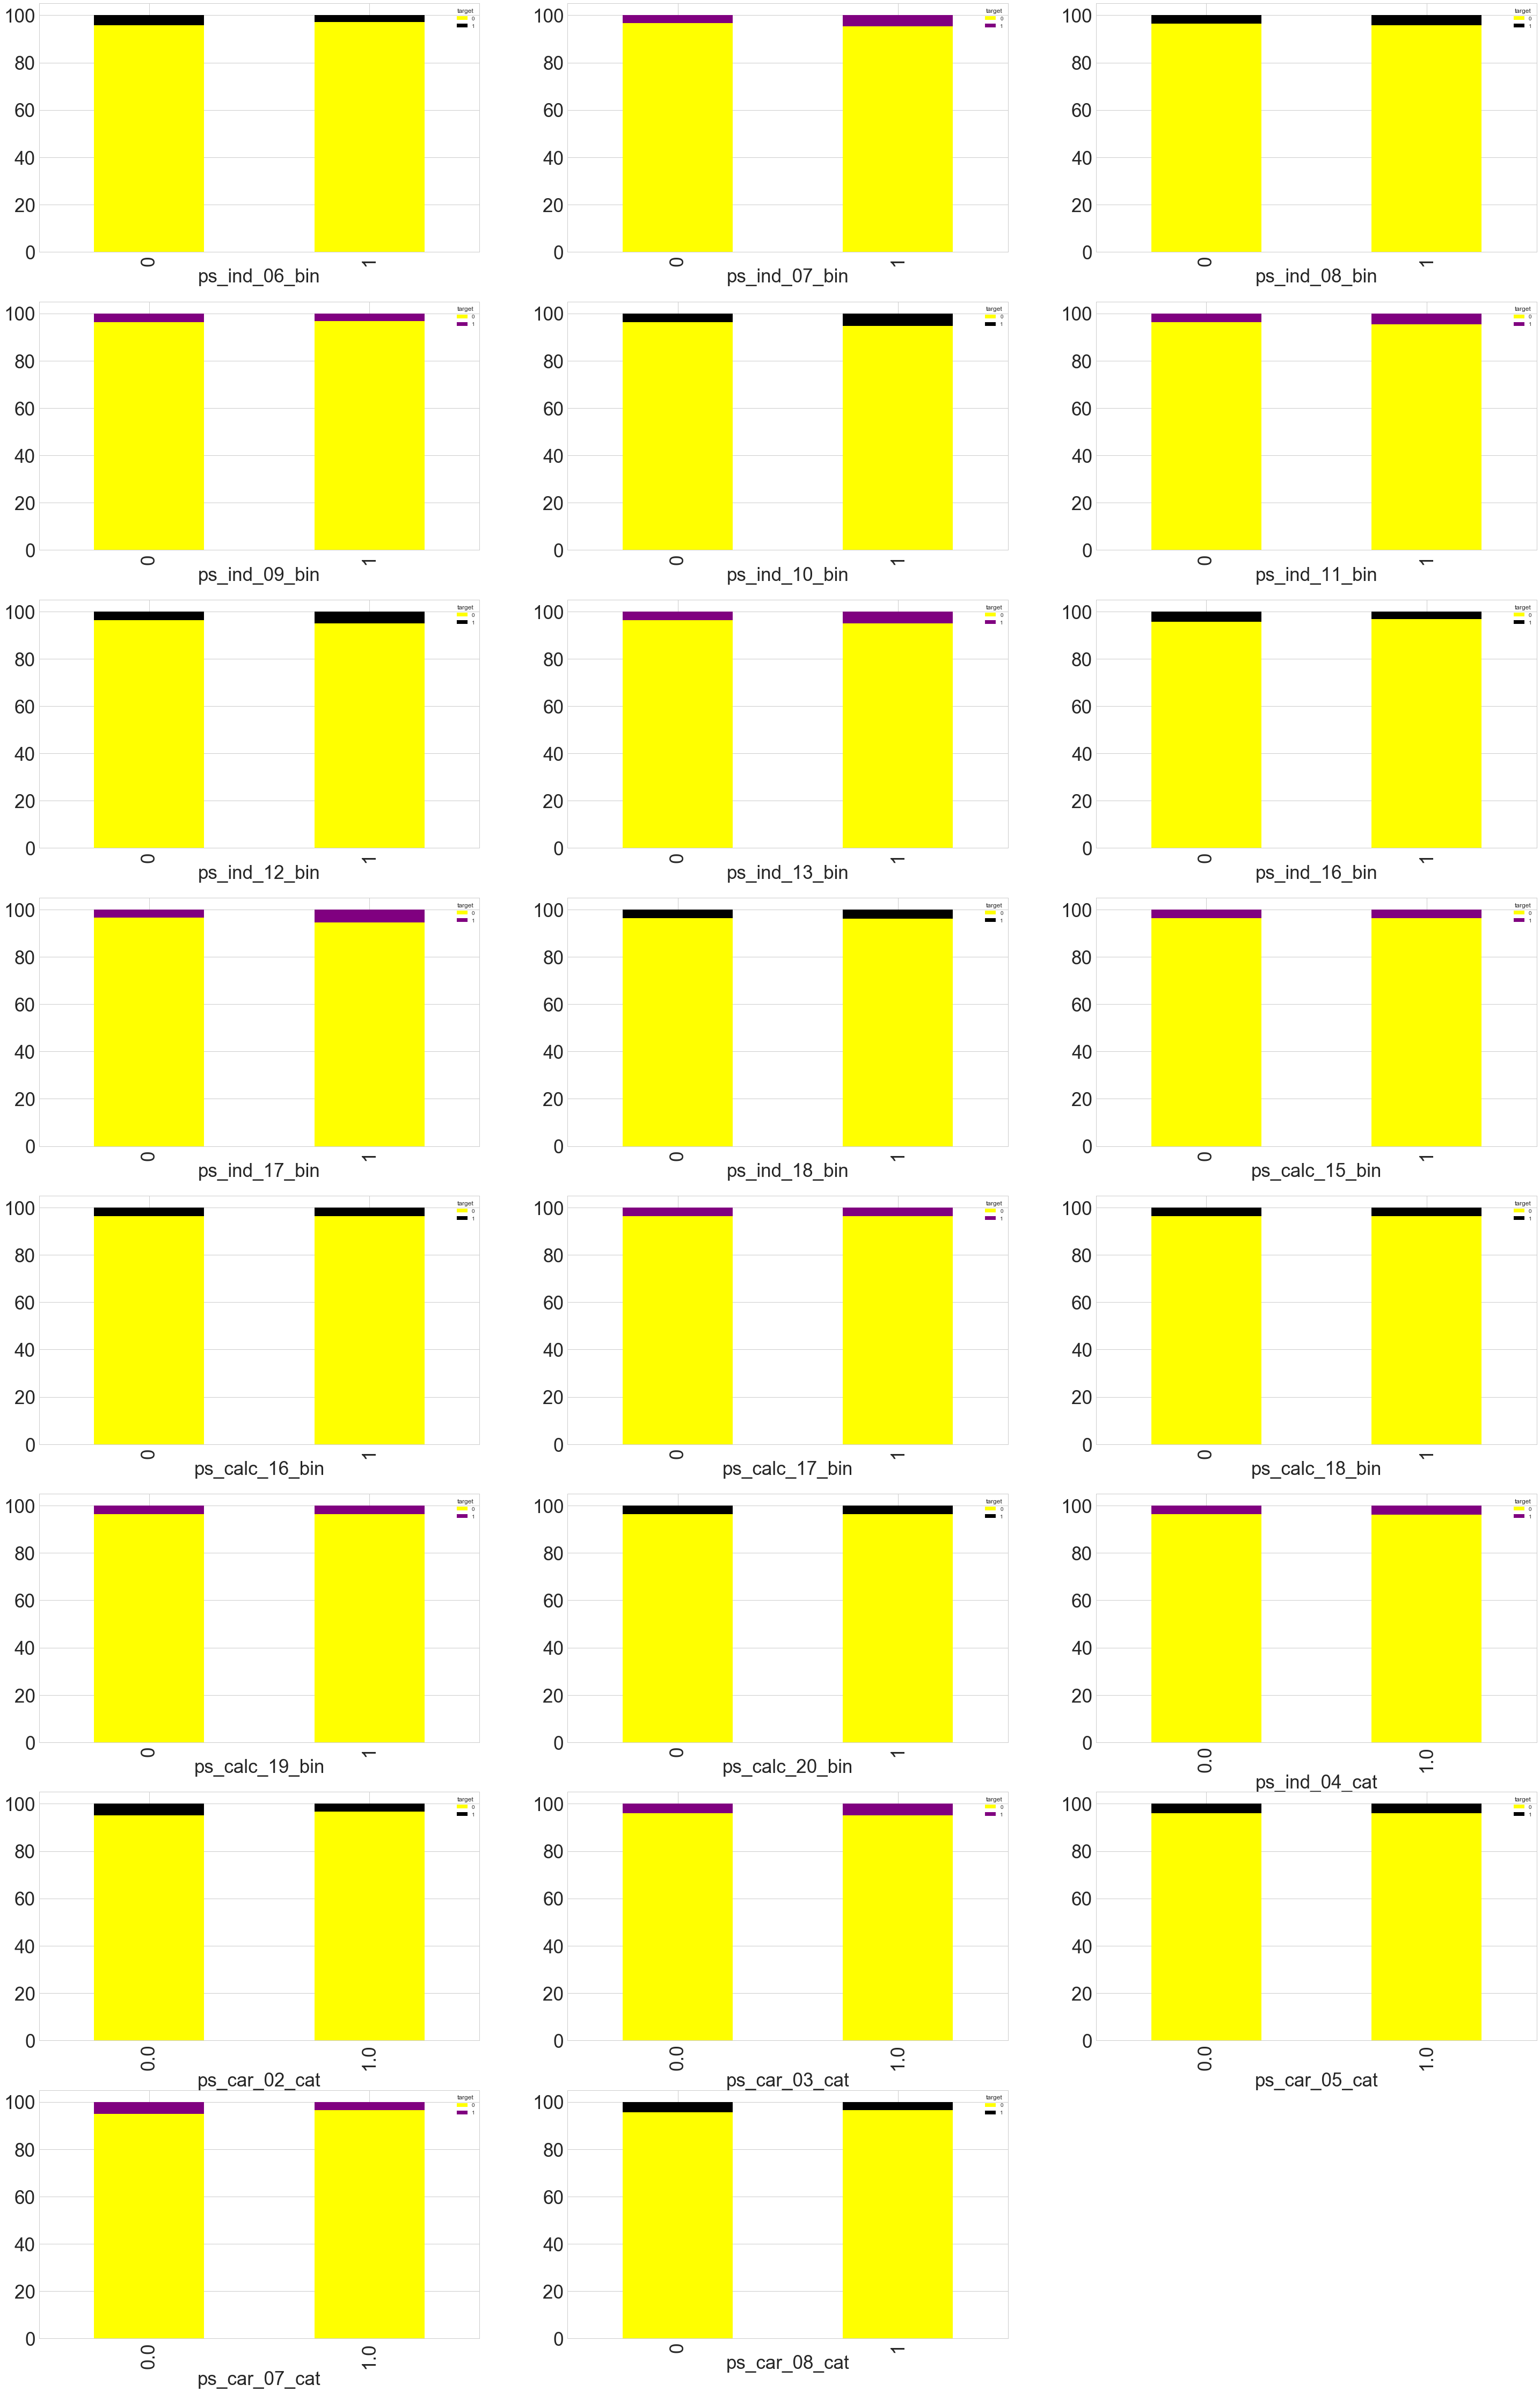

In [9]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

We can see that some variables have different number of claims across levels and some are not.
As an example ps_car_02_cat has more drivers making claim at the category 0, then in category 1. However, for ps_calc_20_bin number of claims from drivers doesn't vary much across categories.

Let's print the tables to see how much amount of claims varies across levels of variables.
For this work was used code from here:
https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side by Yasin Zähringer

In [10]:
from IPython.display import display,HTML

def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))


multi_column_df_display(count)

From these tables we can see that these variables have variation in submitted claims to insurance companies and supposedly are useful:
<span style="color:brown; font-family:Consolas; font-size:1.1em">
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_07_cat, ps_car_08_cat
</span>

These variables don't have much variation across levels and supposedly aren't useful:

<span style="color:brown; font-family:Consolas; font-size:1.1em">
ps_ind_09_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_calc_15_bin, ps_car_05_cat
</span>


Variables <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_03_cat, ps_car_05_cat, ps_car_07_cat</span>
 contain missing values.

<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_03_cat</span> has about 69.1% of missing values, <span style="color:brown; font-family:Consolas; font-size:1.1em"> ps_car_05_cat</span> - has about 44.78% of missing values, <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_ind_04_cat</span> - has about 0.014% missing values and variable <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_07_cat</span> has about 2% of missing values.

Variable <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_03_cat</span> has some important variation. Because it has so many missing values we'll create a third category and call it "2" for this variable. And see what kind of variation it will give us.

We will drop variable <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_05_cat</span>. As we can see it has values across categories slightly above average for insurance claims, but it can be only because it missing so much data.

Variables <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_07_cat</span> and <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_ind_04_cat</span> have not much missing values so we will fill it randomly from non-missing values of this variable.


In [11]:
#drop ps_car_05_cat
drivers.drop('ps_car_05_cat',axis=1, inplace = True)

In [12]:
drivers["ps_car_03_cat"]=drivers["ps_car_03_cat"].fillna(2)

target                 0         1
ps_car_03_cat                     
0.0            96.046239  3.953761
1.0            95.170221  4.829779
2.0            96.729332  3.270668

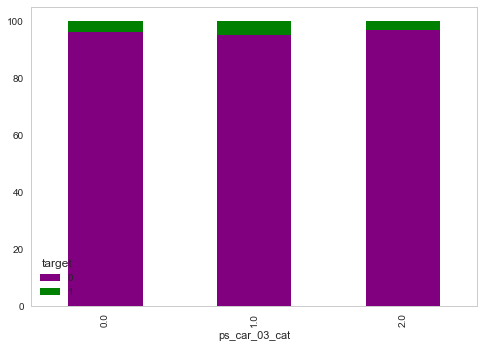

In [13]:
counts=pd.crosstab(drivers['ps_car_03_cat'],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
counts.plot(kind='bar', stacked=True, color=['purple','green'], grid=False)
counts

We can see that it variable has some variation and because we don't know the meaning of this variable we'll leave it in a dataset and decide if we need during feature selection.

In [14]:
drivers['wNaNps_car_07_cat']=drivers["ps_car_07_cat"].dropna()
drivers["ps_car_07_cat"].fillna(np.random.choice(drivers['wNaNps_car_07_cat']),inplace=True)
drivers.drop('wNaNps_car_07_cat',axis=1, inplace = True)
drivers['wNaNps_ind_04_cat']=drivers["ps_ind_04_cat"].dropna()
drivers["ps_ind_04_cat"].fillna(np.random.choice(drivers['wNaNps_ind_04_cat']),inplace=True)
drivers.drop('wNaNps_ind_04_cat',axis=1, inplace = True)

### Plot categorical nominal variables

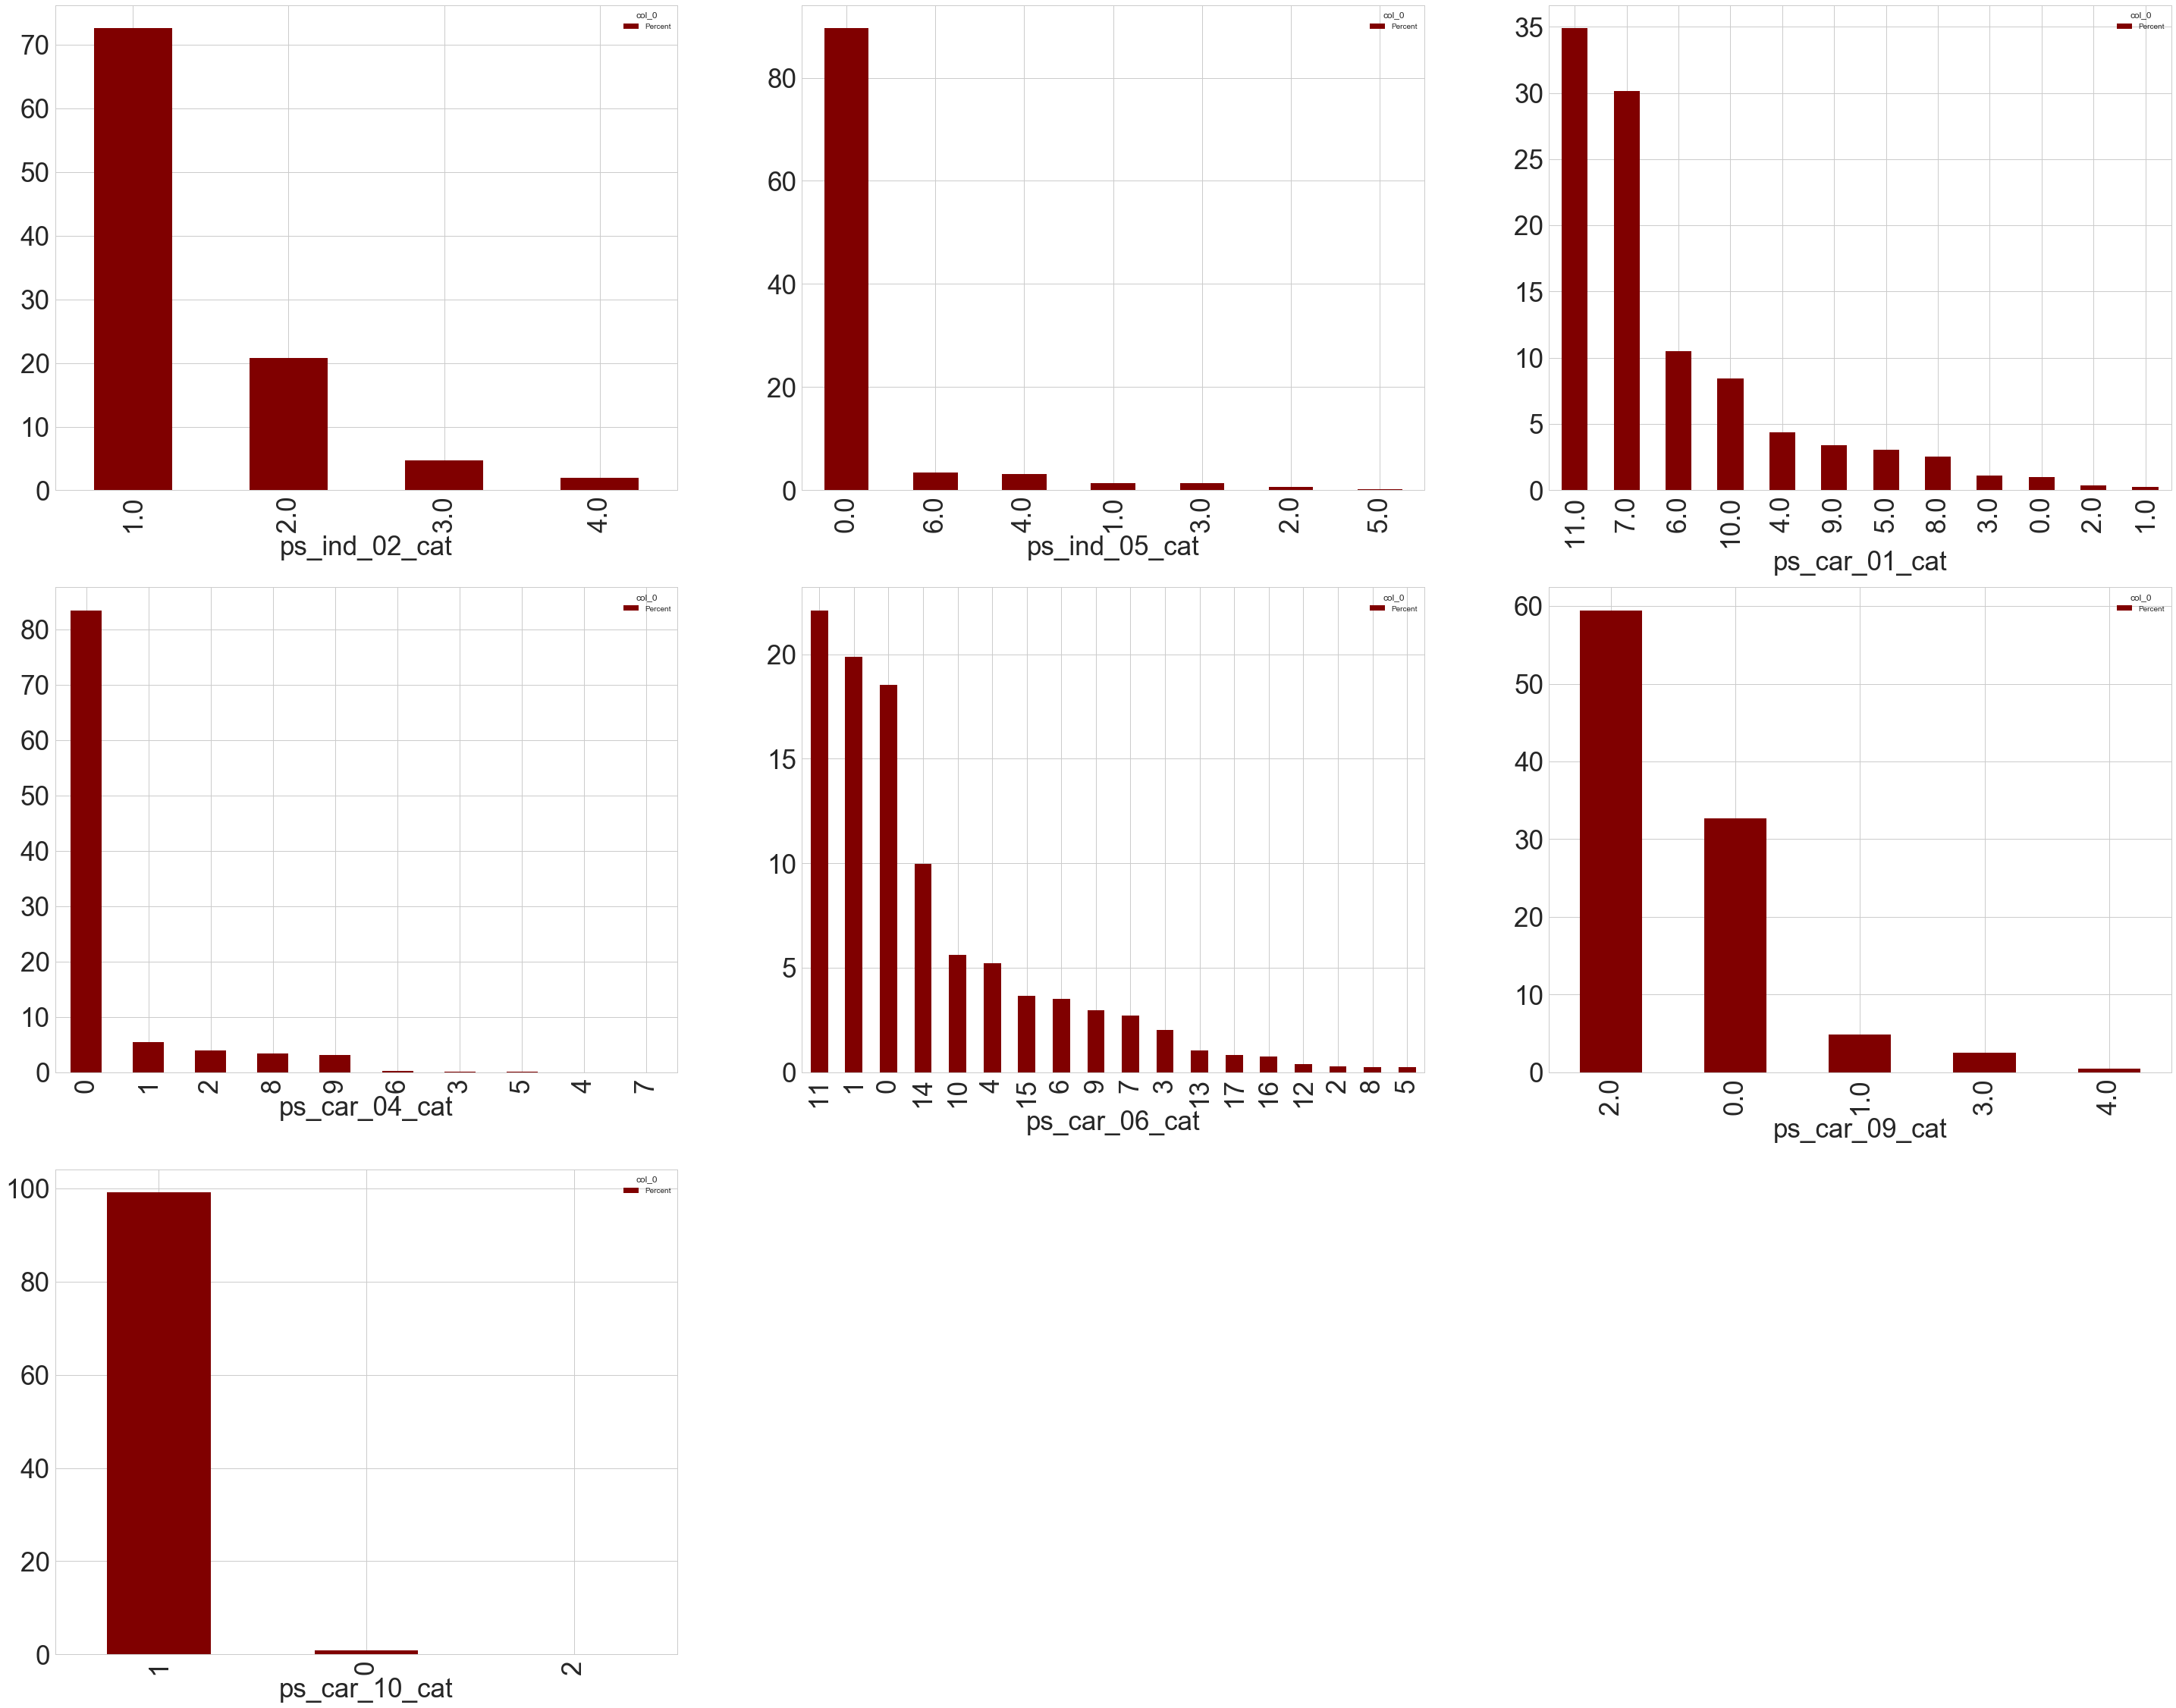

In [15]:
#plot nominal variables
cat=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat"]
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(cat):
    ax=fig.add_subplot(3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)

plt.show()

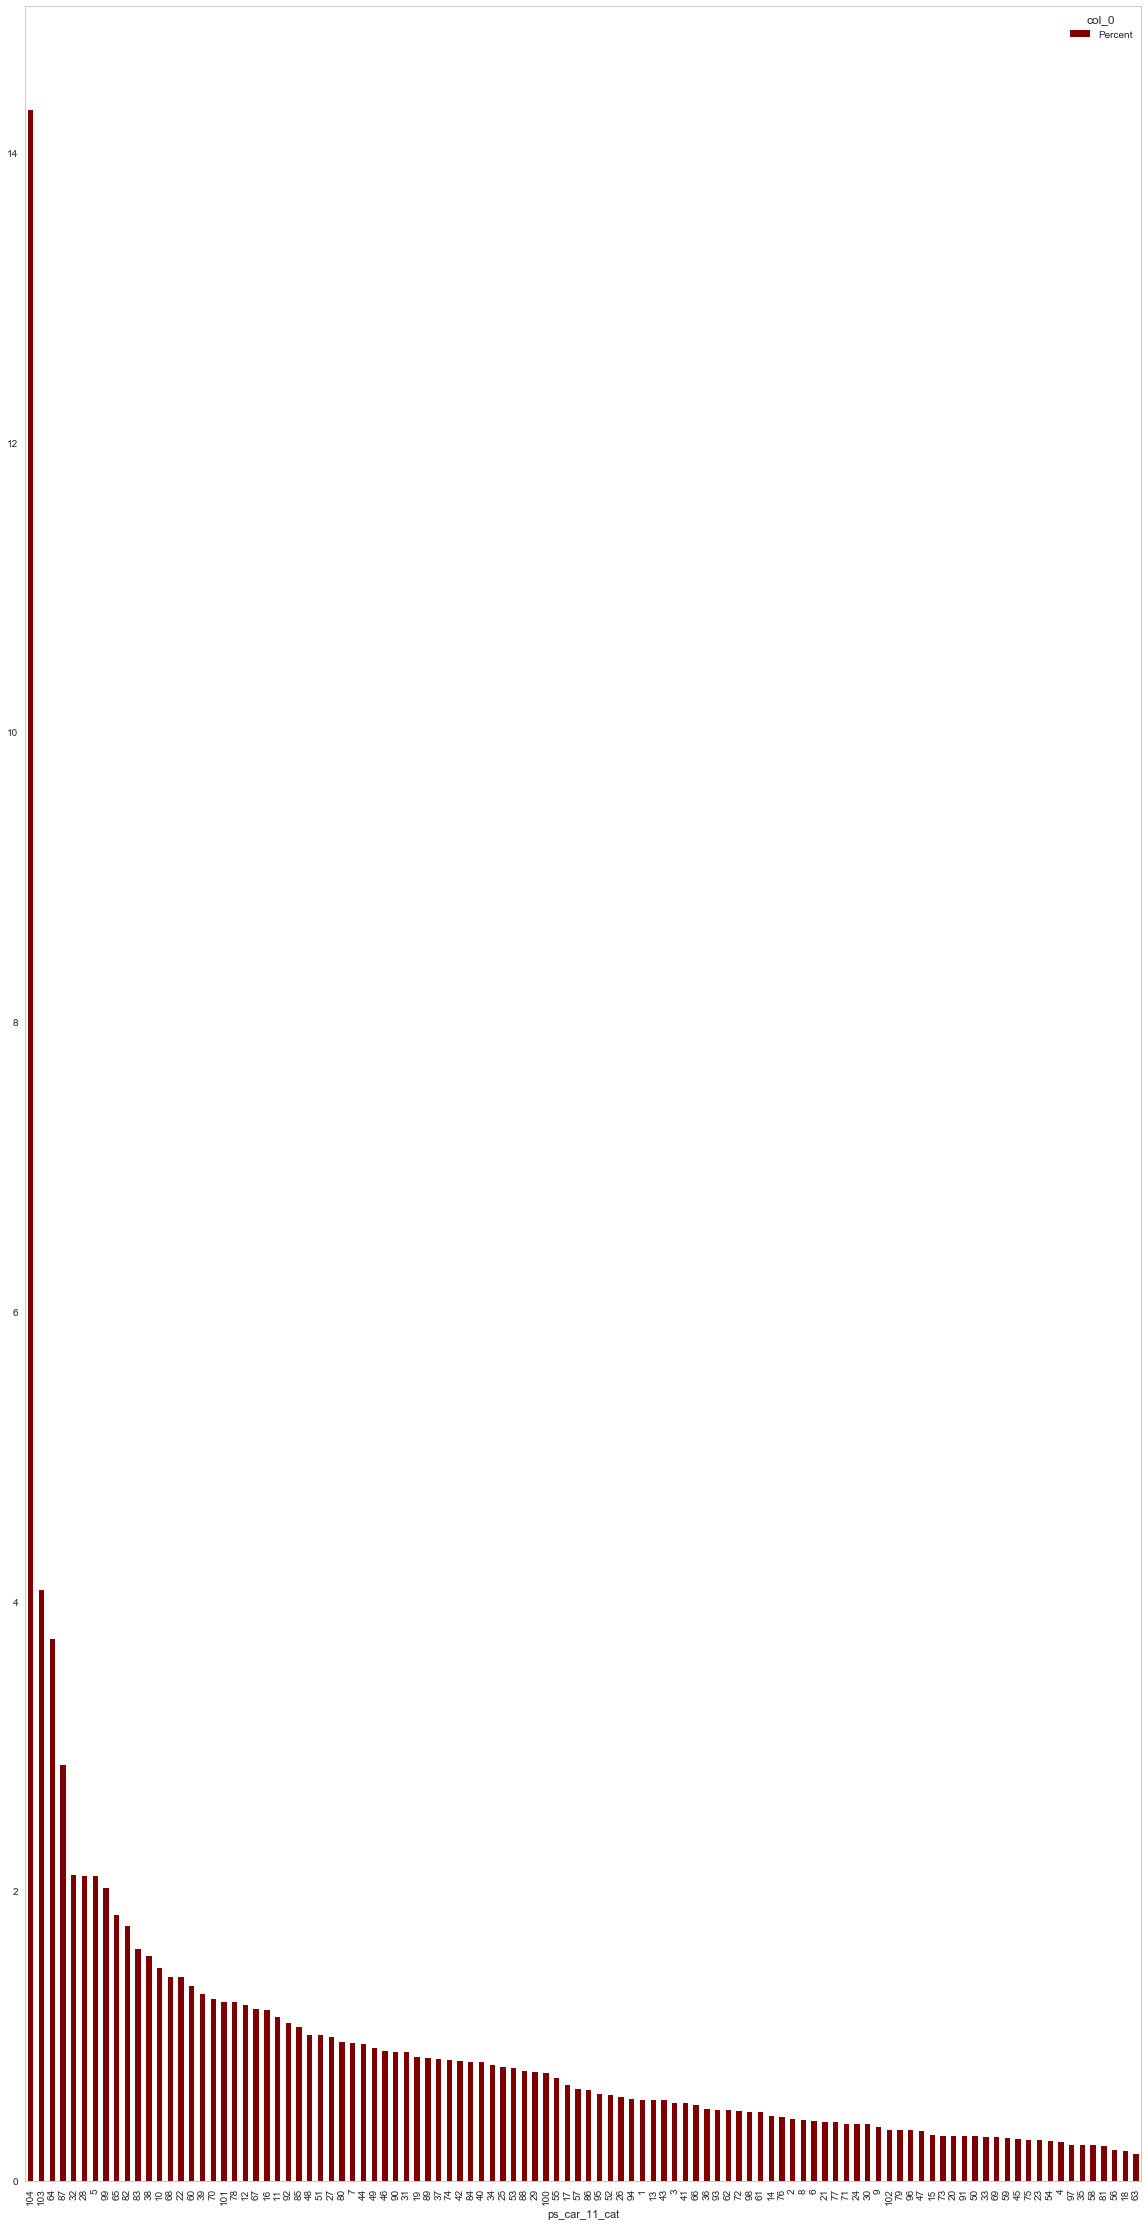

In [16]:
counts=pd.crosstab(index=drivers['ps_car_11_cat'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
counts.plot(kind='bar', stacked=True, color=['maroon'], grid=False,figsize=(20,40))

We can see that most of categorical variables are highly unbalanced. <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_11_cat</span> has enormous amount of levels.

Now, let's have a look at variation of target variable across categories of these variables.

We can see that this variable has 13 categories. With majority of records (10%) in category 7 and minority in category 1 (2%). But this is not heavely unbalanced.
Let's have a look how target variable varies across categories.

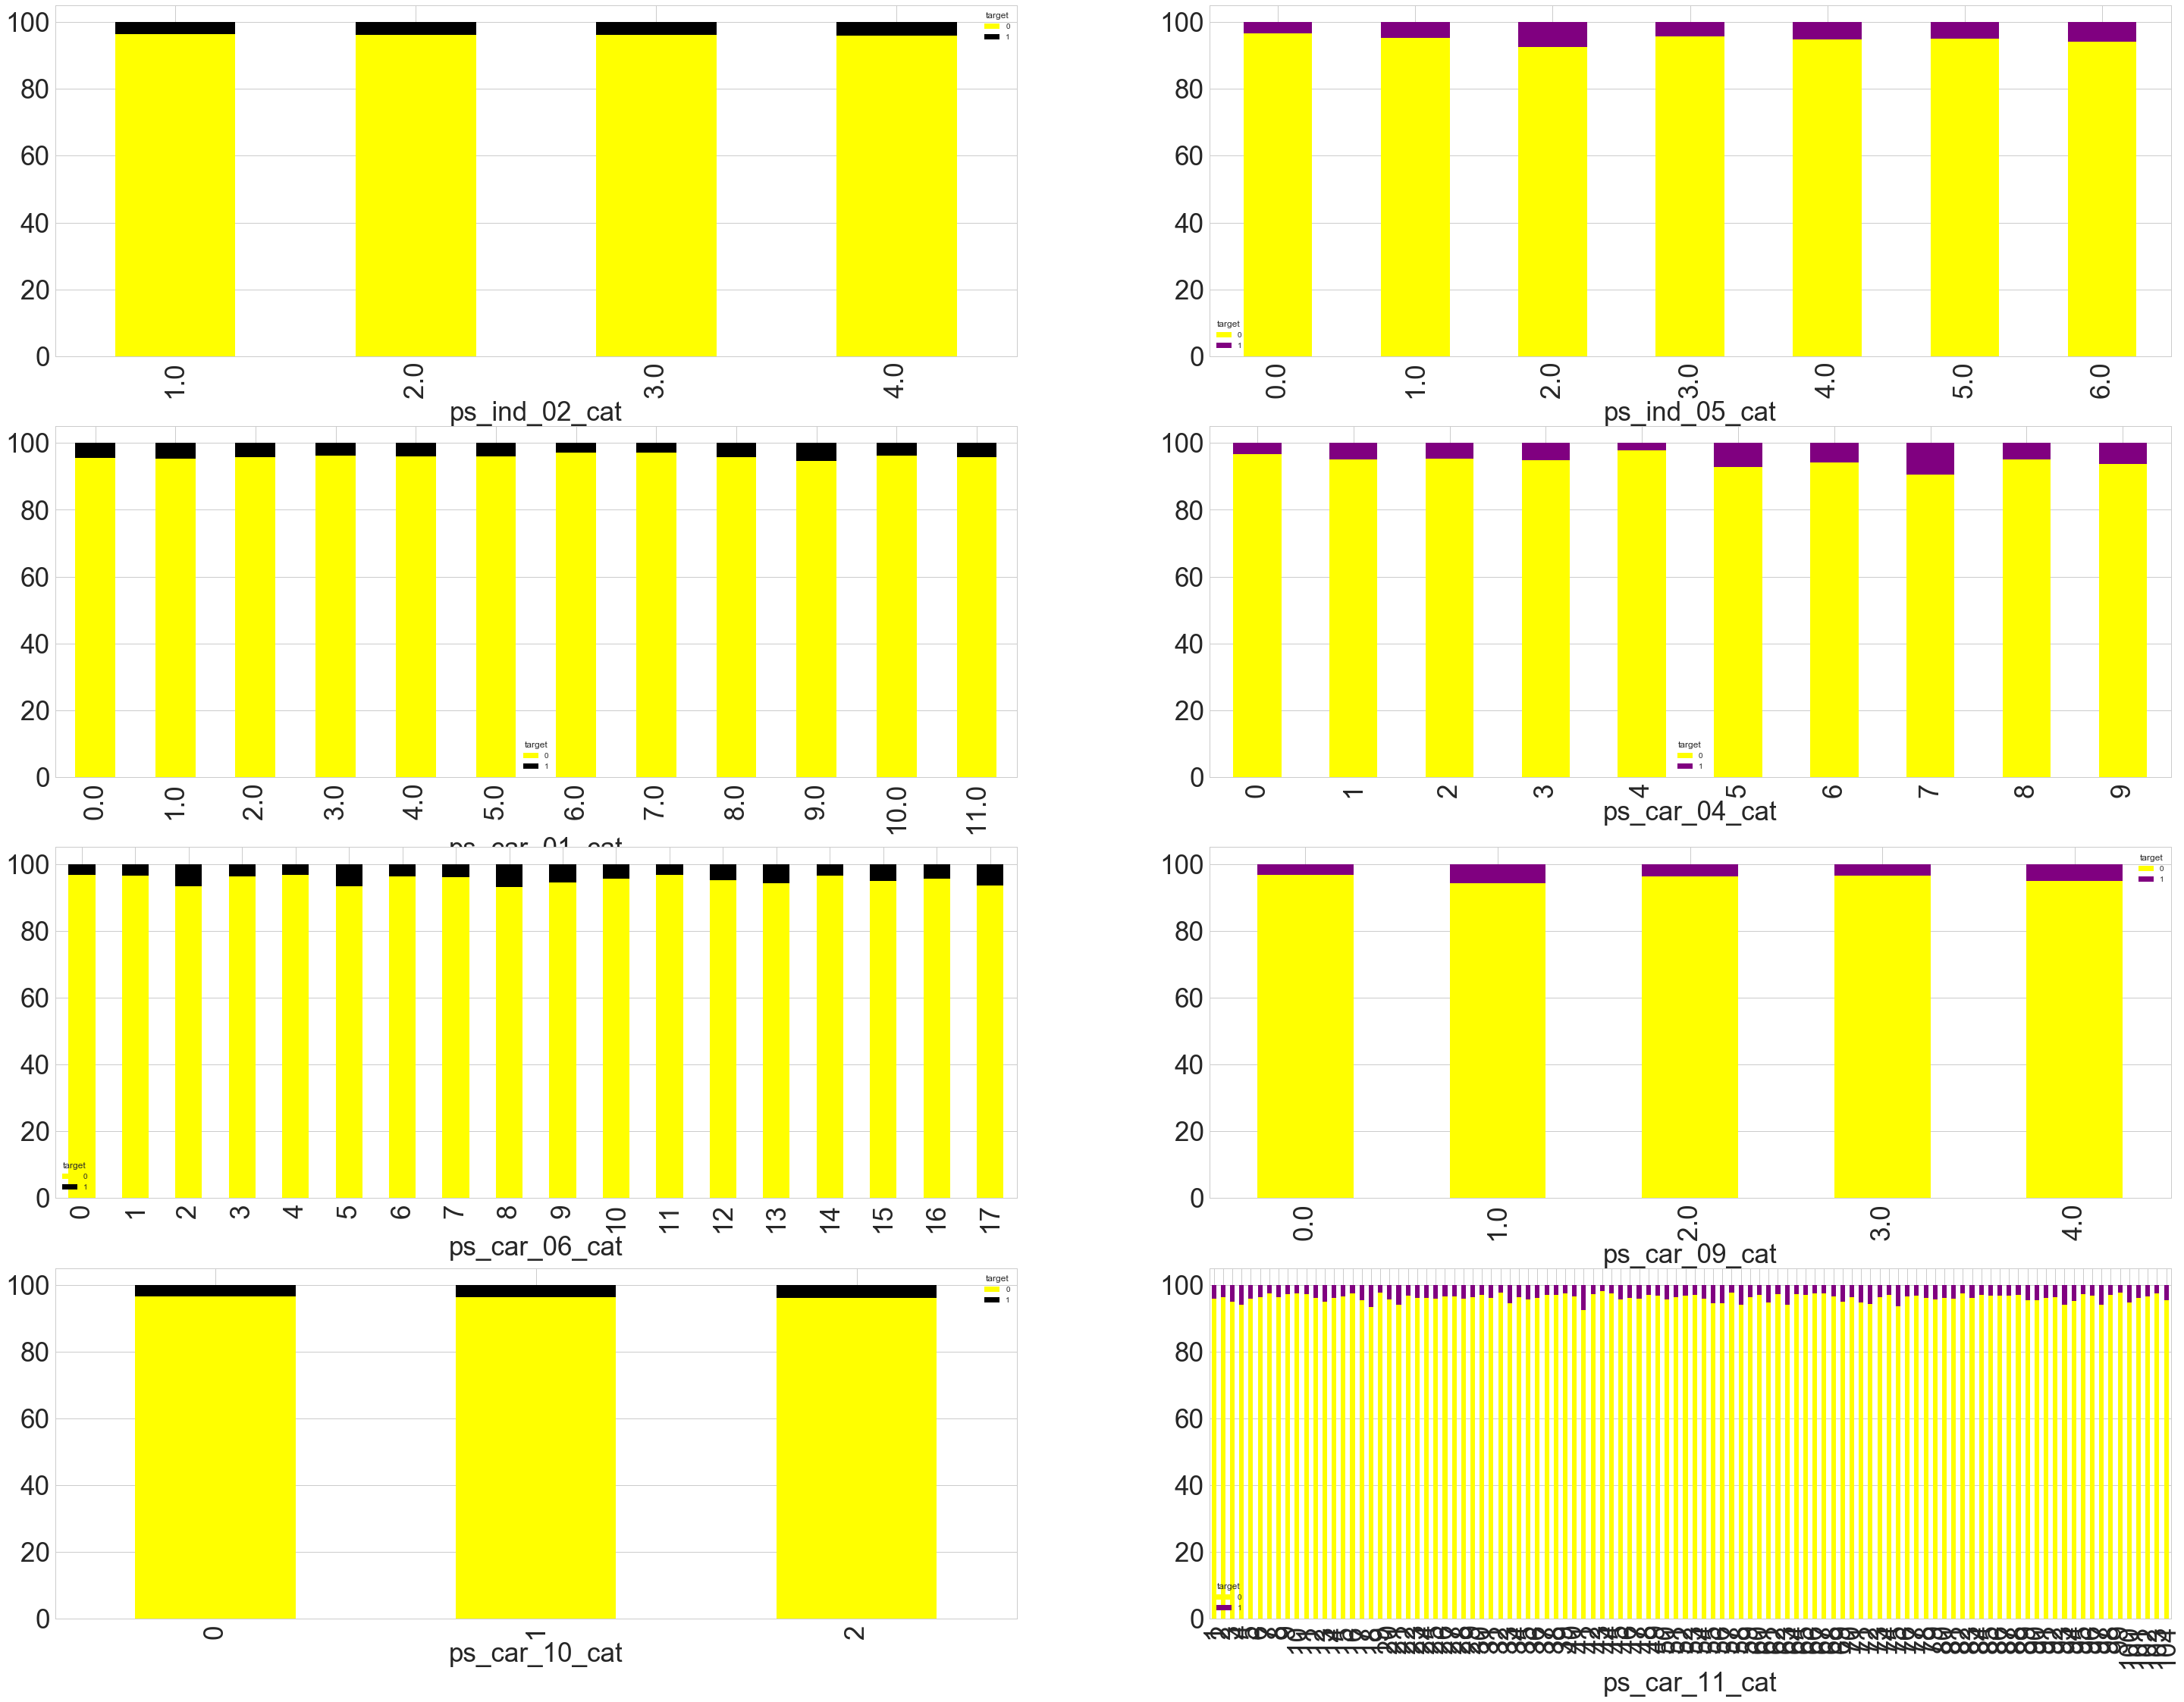

In [17]:
cat2=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat","ps_car_11_cat"]
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(cat2):
    ax=fig.add_subplot(8,2,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [18]:
multi_column_df_display(count)

We can see that most of the nominal categorical variables can turn out useful except <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_10_cat </span>which doesn't have much variation.

Following variables have small percentage of missing values:

<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_09_cat, ps_car_02_cat, ps_car_01_cat, ps_ind_05_cat, ps_ind_02_cat</span>


We will replace them with the most frequent category.

In [19]:
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(drivers[["ps_car_09_cat"]])
drivers["ps_car_09_cat"]=imp.transform(drivers[["ps_car_09_cat"]]).ravel()
imp.fit(drivers[["ps_car_02_cat"]])
drivers["ps_car_02_cat"]=imp.transform(drivers[["ps_car_02_cat"]]).ravel()
imp.fit(drivers[["ps_car_01_cat"]])
drivers["ps_car_01_cat"]=imp.transform(drivers[["ps_car_01_cat"]]).ravel()
imp.fit(drivers[["ps_ind_05_cat"]])
drivers["ps_ind_05_cat"]=imp.transform(drivers[["ps_ind_05_cat"]]).ravel()
imp.fit(drivers[["ps_ind_02_cat"]])
drivers["ps_ind_02_cat"]=imp.transform(drivers[["ps_ind_02_cat"]]).ravel()

### Plot ordinal variables

Because we don't know the nature of those variables, if they have even interval and we will use them in linear models and non-linear ones, we will treat them as categorical.

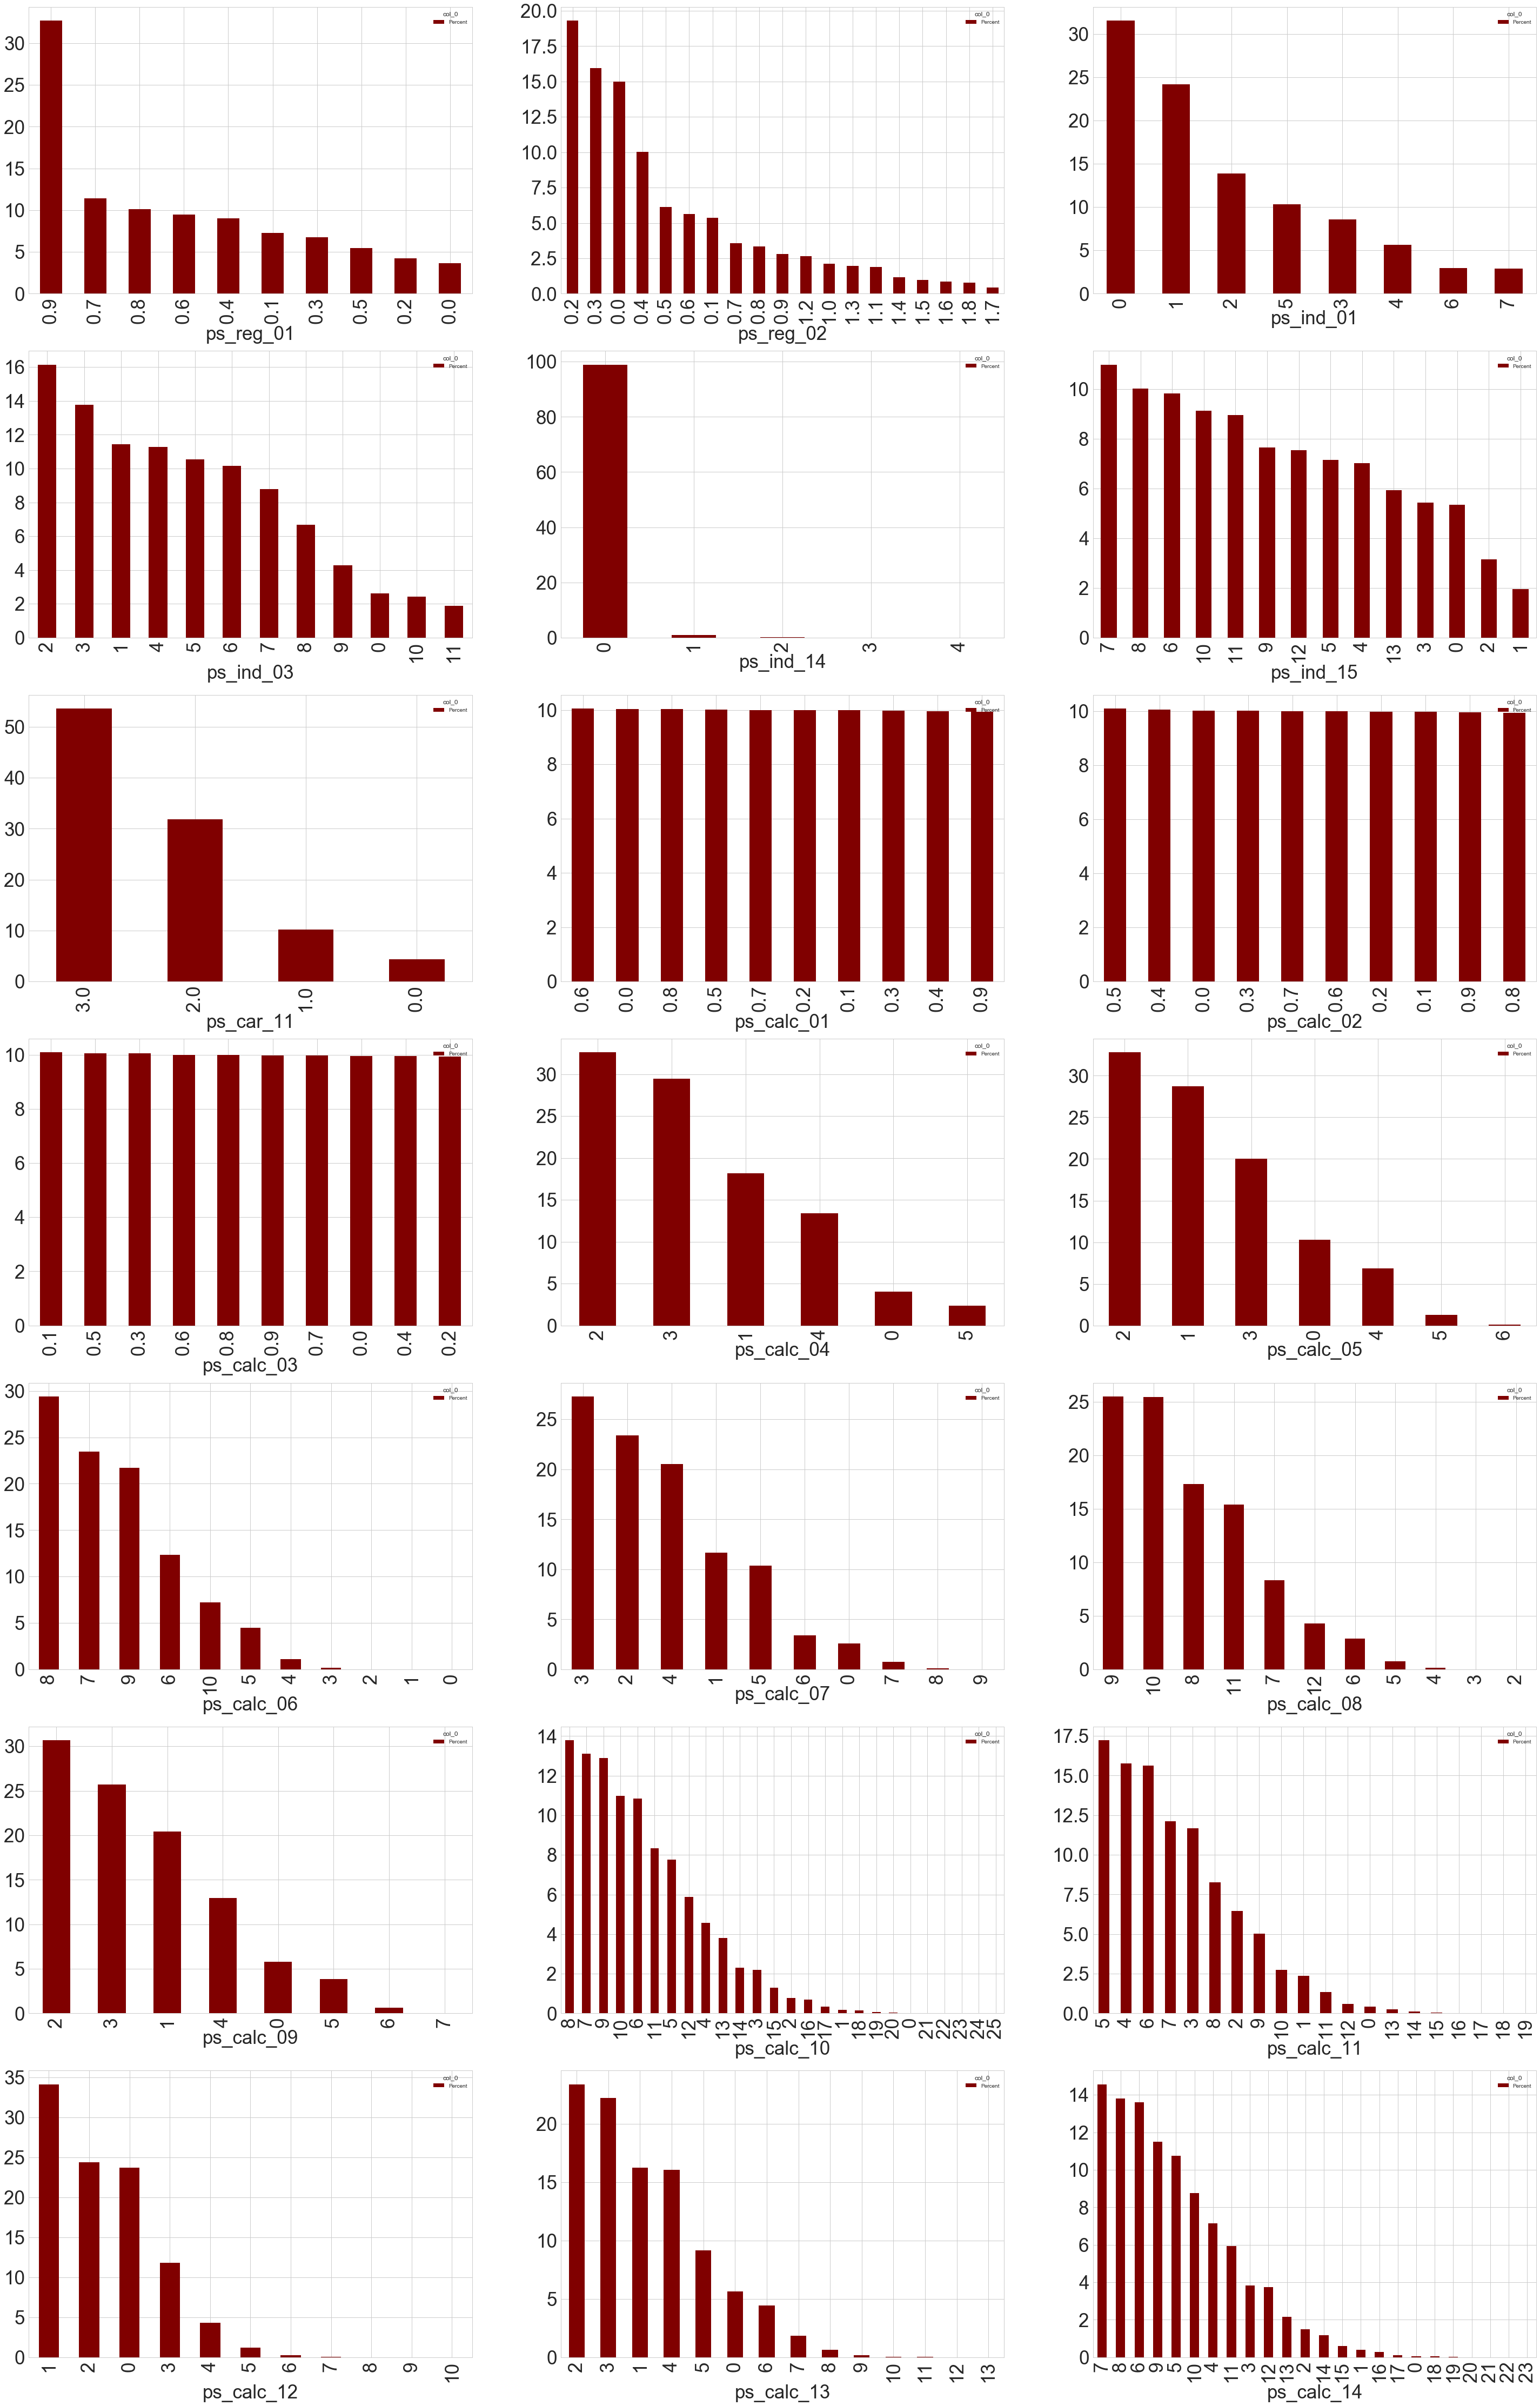

In [20]:
#plot ordinal variables
ordinal=['ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="maroon",ax=ax)
plt.show()

We can see that some of these variables are balanced and some are highly unbalanced.

Let's have at variation of these variables across the target variable.

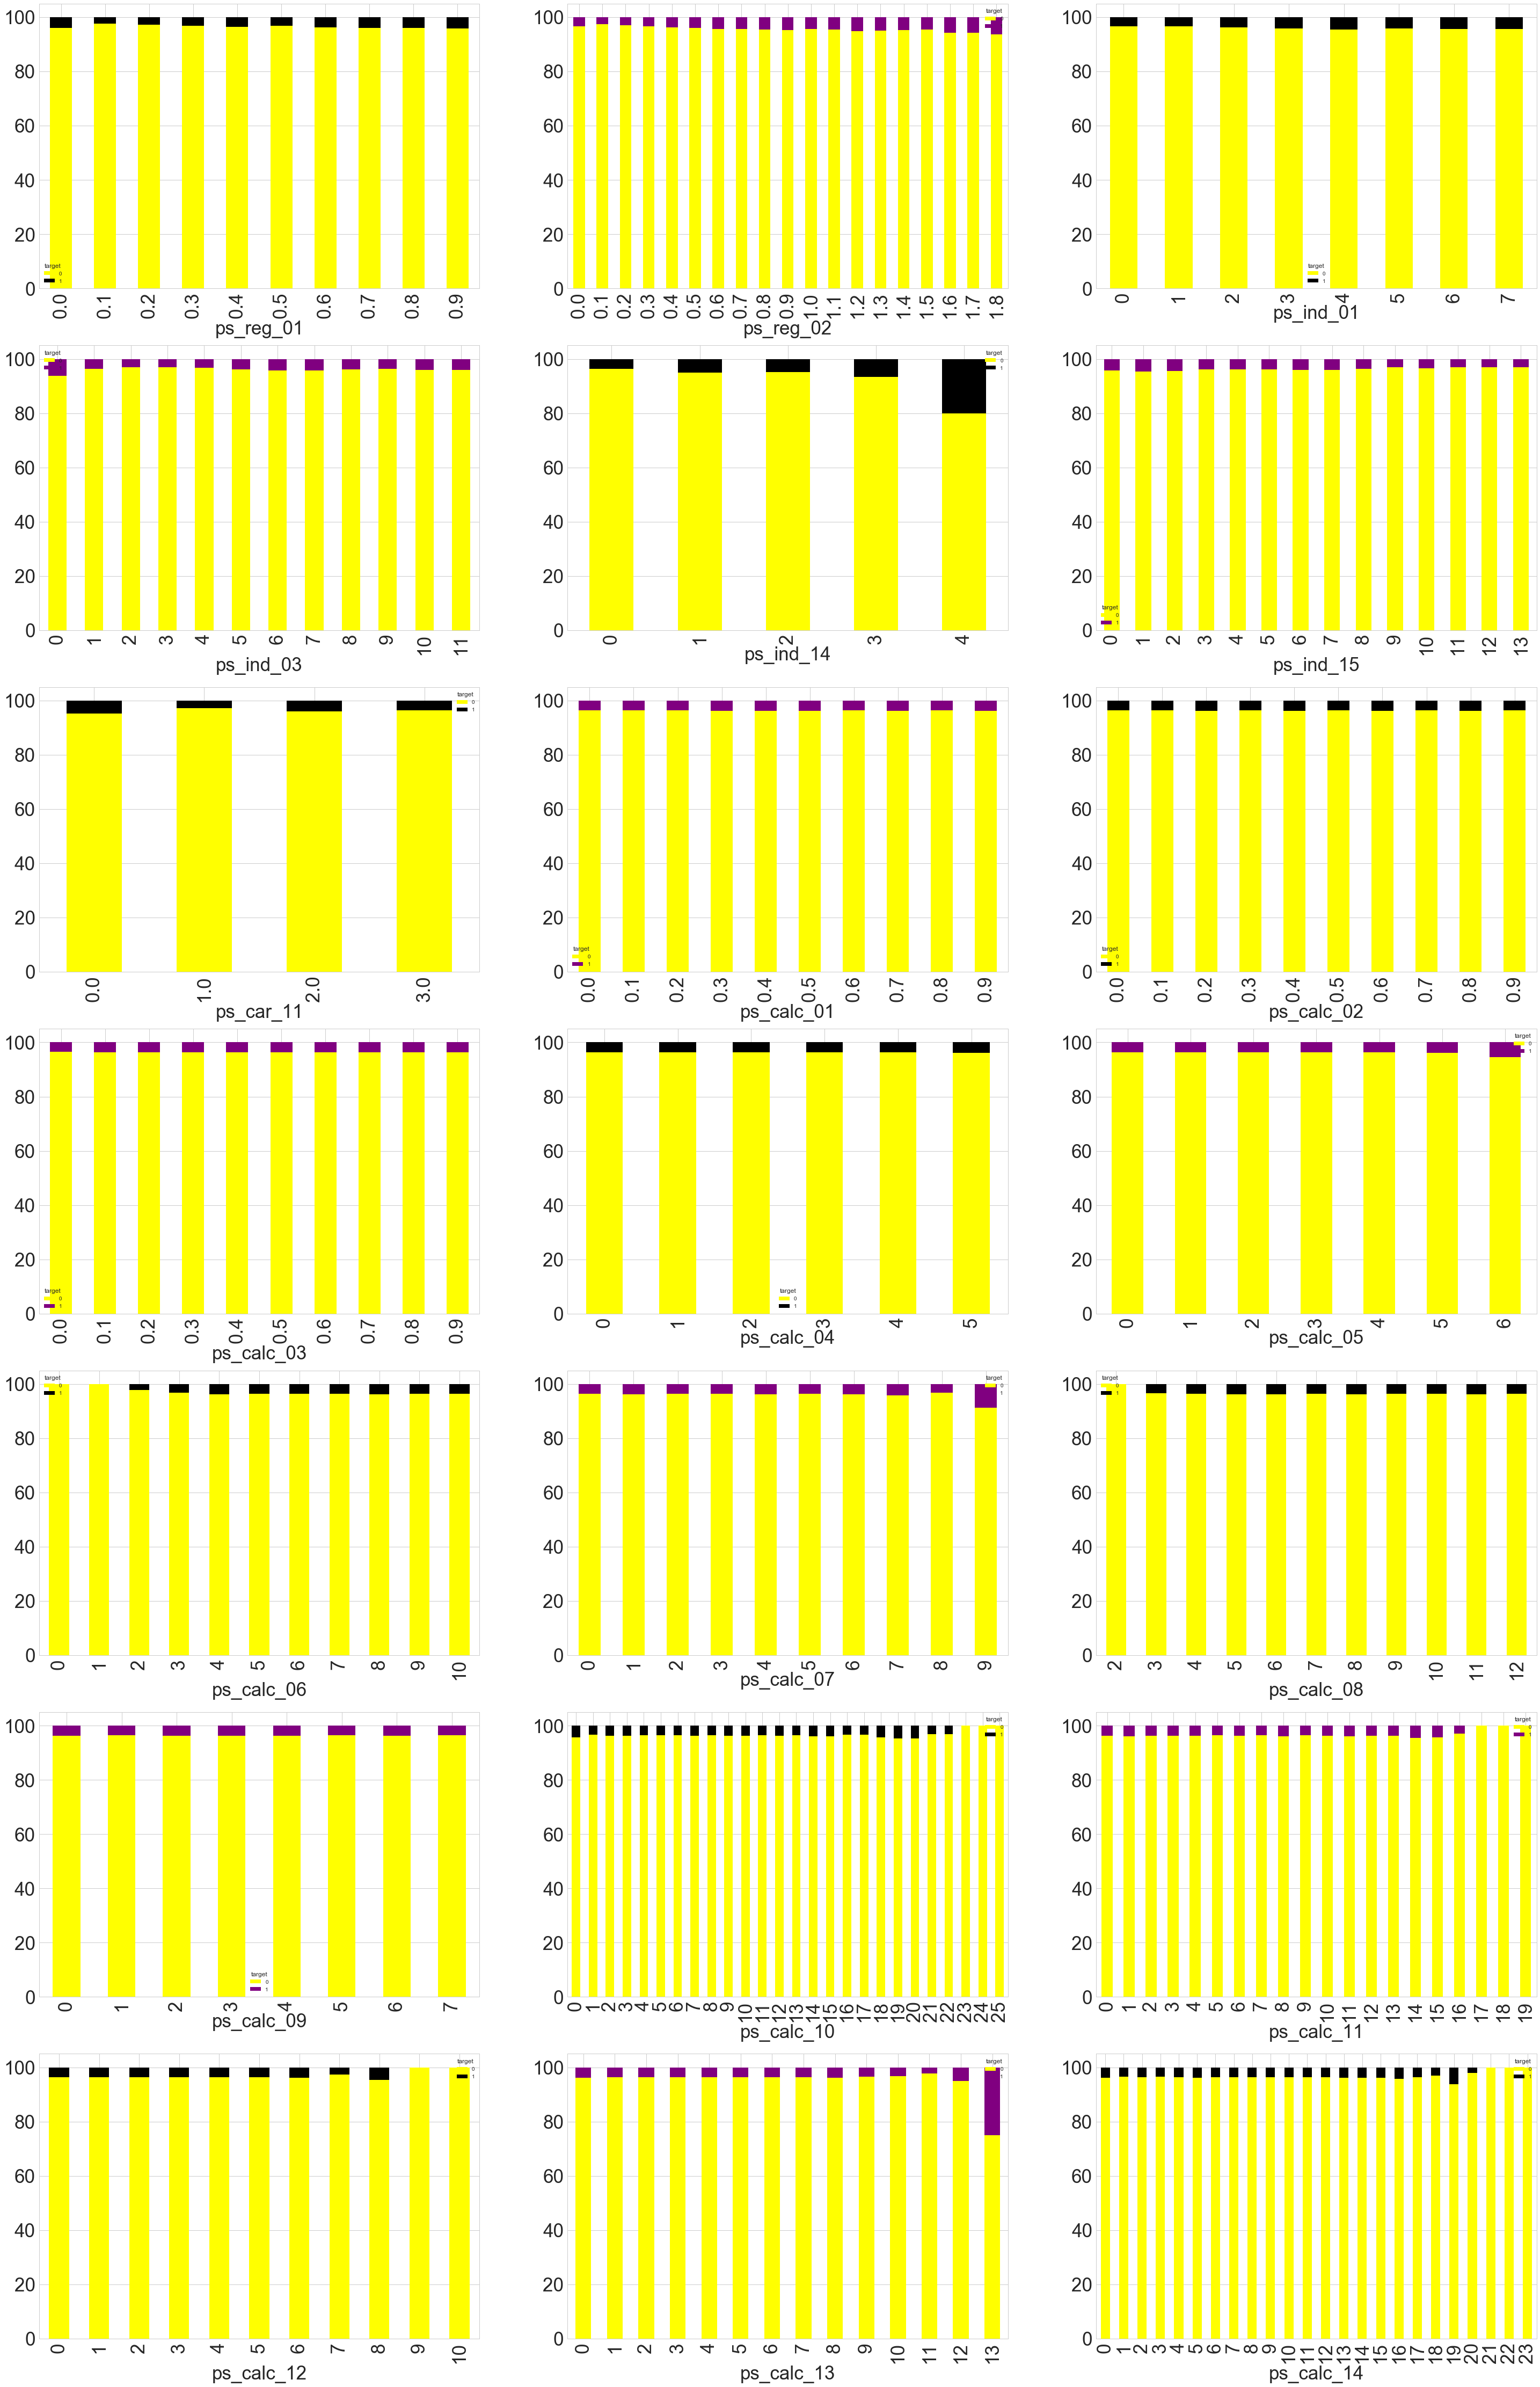

In [21]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [22]:
multi_column_df_display(count)

We can see that some categories have a lot variation in submitted claims. And some variables almost don't have any variation. Such variables are:

<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,ps_calc_09</span>.


And of course we always should keep in mind that we have a lot of highly unbalanced variables. For this reason we'll use spatial tools to find the most useful variables for model building.

<span style="color:brown; font-family:Consolas; font-size:1.1em">ps_car_11</span> has some missing values. We'll replace them with the most frequent category.

In [23]:
imp.fit(drivers[["ps_car_11"]])
drivers["ps_car_11"]=imp.transform(drivers[["ps_car_11"]]).ravel()

In [24]:
ordinal=['ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']

### Continuous variables

Let's print first few rows of each continuous variable to be sure it is continuous.

In [25]:
contin=['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
drivers[contin].head(n=20)

ps_reg_03  ps_car_12  ps_car_13  ps_car_14  ps_car_15
0    0.718070   0.400000   0.883679   0.370810   3.605551
1    0.766078   0.316228   0.618817   0.388716   2.449490
2         NaN   0.316228   0.641586   0.347275   3.316625
3    0.580948   0.374166   0.542949   0.294958   2.000000
4    0.840759   0.316070   0.565832   0.365103   2.000000
5    2.332649   0.445982   0.879049   0.406202   3.000000
6    0.617454   0.316228   0.639683   0.368782   3.162278
7    0.607248   0.446990   0.900574   0.374833   3.316625
8    0.901388   0.400000   0.780641   0.407431   2.828427
9    2.316652   0.447214   1.458184   0.390256   3.605551
10   0.795692   0.447214   0.875198   0.429535   2.828427
11   0.378319   0.374166   0.954491   0.379342   3.741657
12   0.548293   0.374166   0.765339   0.385097   3.162278
13   0.684197   0.400000   0.983311   0.356090   3.605551
14   1.052972   0.316228   0.566525   0.358329   2.645751
15        NaN   0.547723   1.719158   0.532917   3.741657
16   0.699553   0.316228   0.763704   0.349857   3.605551
17   0.810864   0.316228   0.876295   0.320780   3.605551
18        NaN   0.400000   0.668228   0.366333   2.828427
19   0.402337   0.315278   0.464593   0.361248   0.000000

Because now we are sure that this is continuous variables we will plot them.

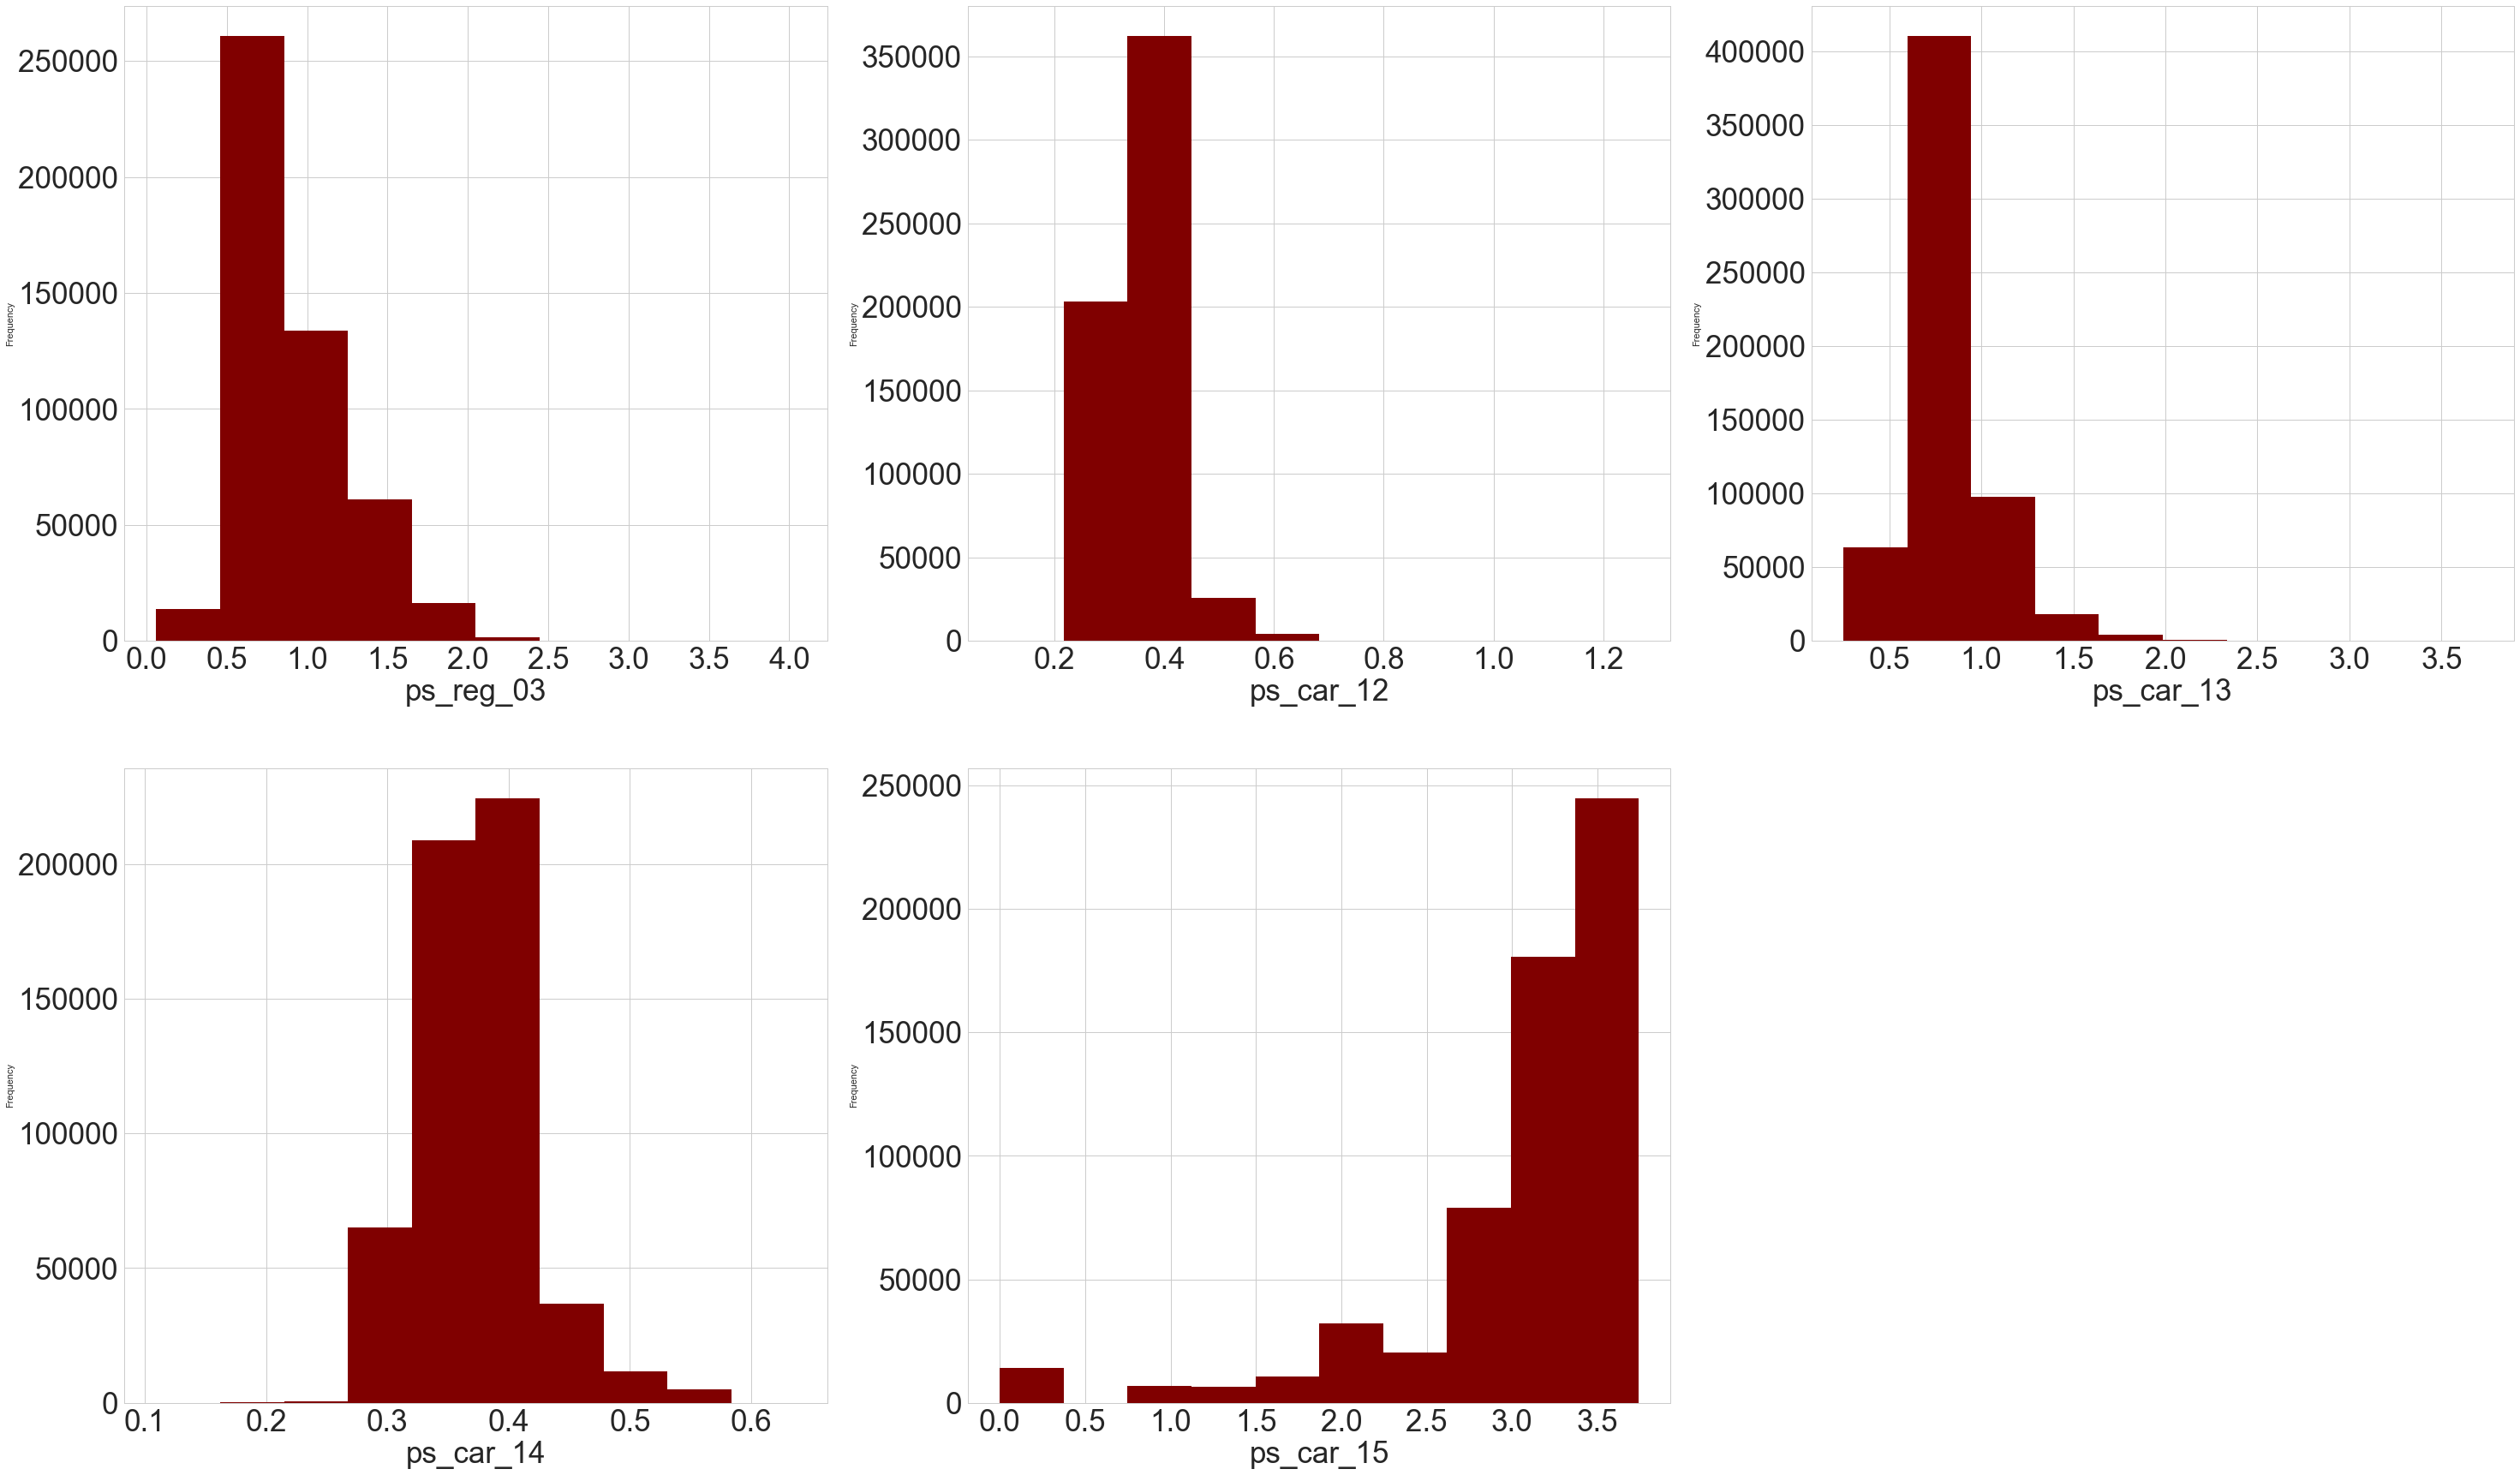

In [26]:
fig=plt.figure(figsize=(50,30))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel(plot_vars, fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    drivers[plot_vars].plot.hist(color="maroon",ax=ax)
plt.show()

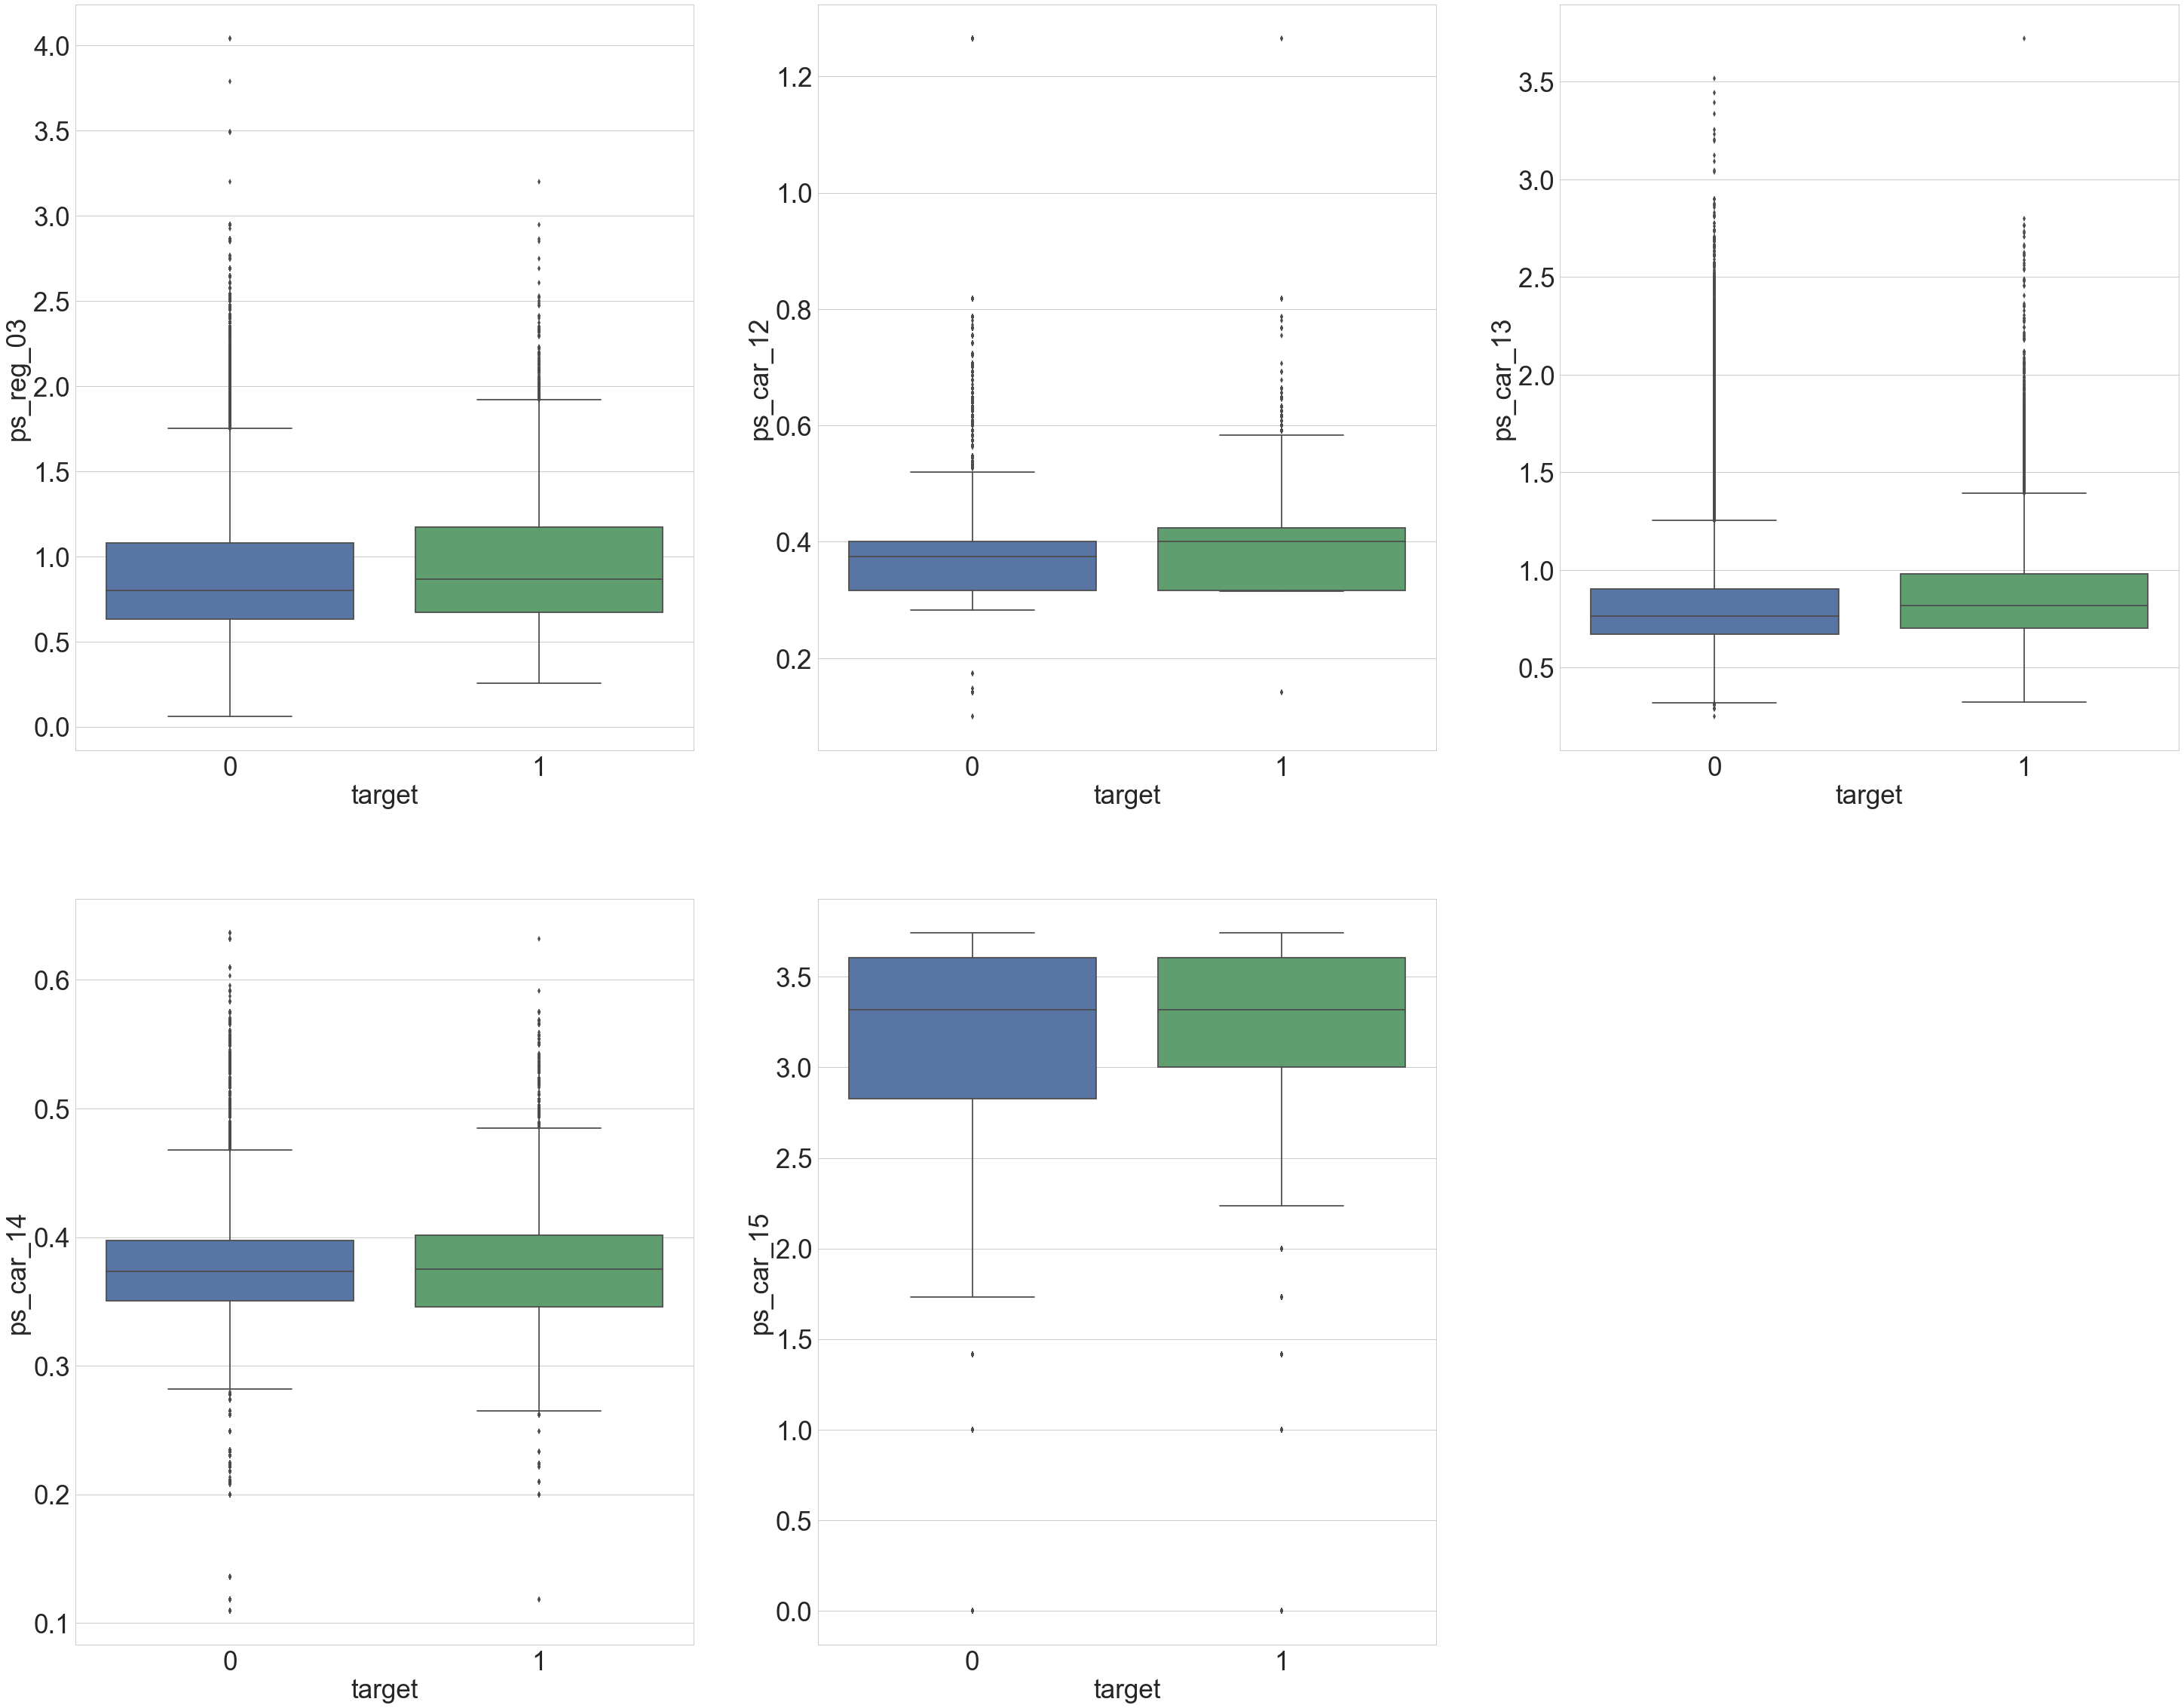

In [27]:
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    sns.boxplot(x="target", y=plot_vars, data=drivers)
plt.show()

We can see that distribution of this variables are highly skewed. That's why we have so many outliers. We'll need to normolize and scale them. But before this we need to impute missing values with the median value because median is better measure for skewed distribution than mean.

In [28]:
imp=Imputer(missing_values="NaN", strategy="median")
imp.fit(drivers[["ps_car_12"]])
drivers["ps_car_12"]=imp.transform(drivers[["ps_car_12"]]).ravel()
imp.fit(drivers[["ps_car_14"]])
drivers["ps_car_14"]=imp.transform(drivers[["ps_car_14"]]).ravel()

Variable <span style="color:brown; font-family:Consolas; font-size:1.1em">ps_reg_03</span> contains about 18% of missing values. For this reason let's have a look if it is the target variable has variation across it.

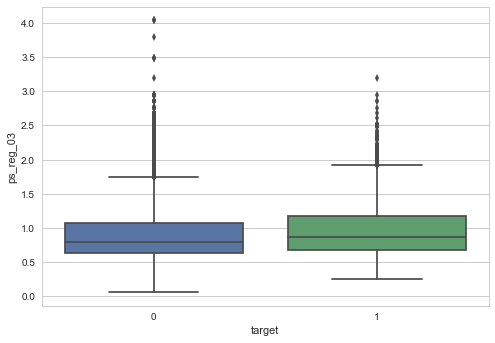

In [29]:
sns.boxplot(x="target", y="ps_reg_03", data=drivers)

We can see that at level 0 of target variable this variable has more variation and outliers. Also, the median of this variable for target level 1 is slightly higher than for value 0. We'll build regression models to impute this variable.

In [30]:
pd.options.mode.chained_assignment = None
#we will make logaritmic trancformation on this variables. They are right skewed and this transformation will help them.
new_con=['ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']
drivers['ps_car_12'][drivers['ps_car_12']==0]=0.000001
drivers['ps_car_12']=np.log(drivers['ps_car_12'])
drivers['ps_car_13'][drivers['ps_car_13']==0]=0.000001
drivers['ps_car_13']=np.log(drivers['ps_car_13'])
drivers['ps_car_14'][drivers['ps_car_14']==0]=0.000001
drivers['ps_car_14']=np.log(drivers['ps_car_14'])
#for variable "ps_car_15' we will use box-cox to find appropriate transformation.
drivers['ps_car_15'][drivers['ps_car_15']==0]=0.000001
drivers["ps_car_15"],_=boxcox(drivers["ps_car_15"])


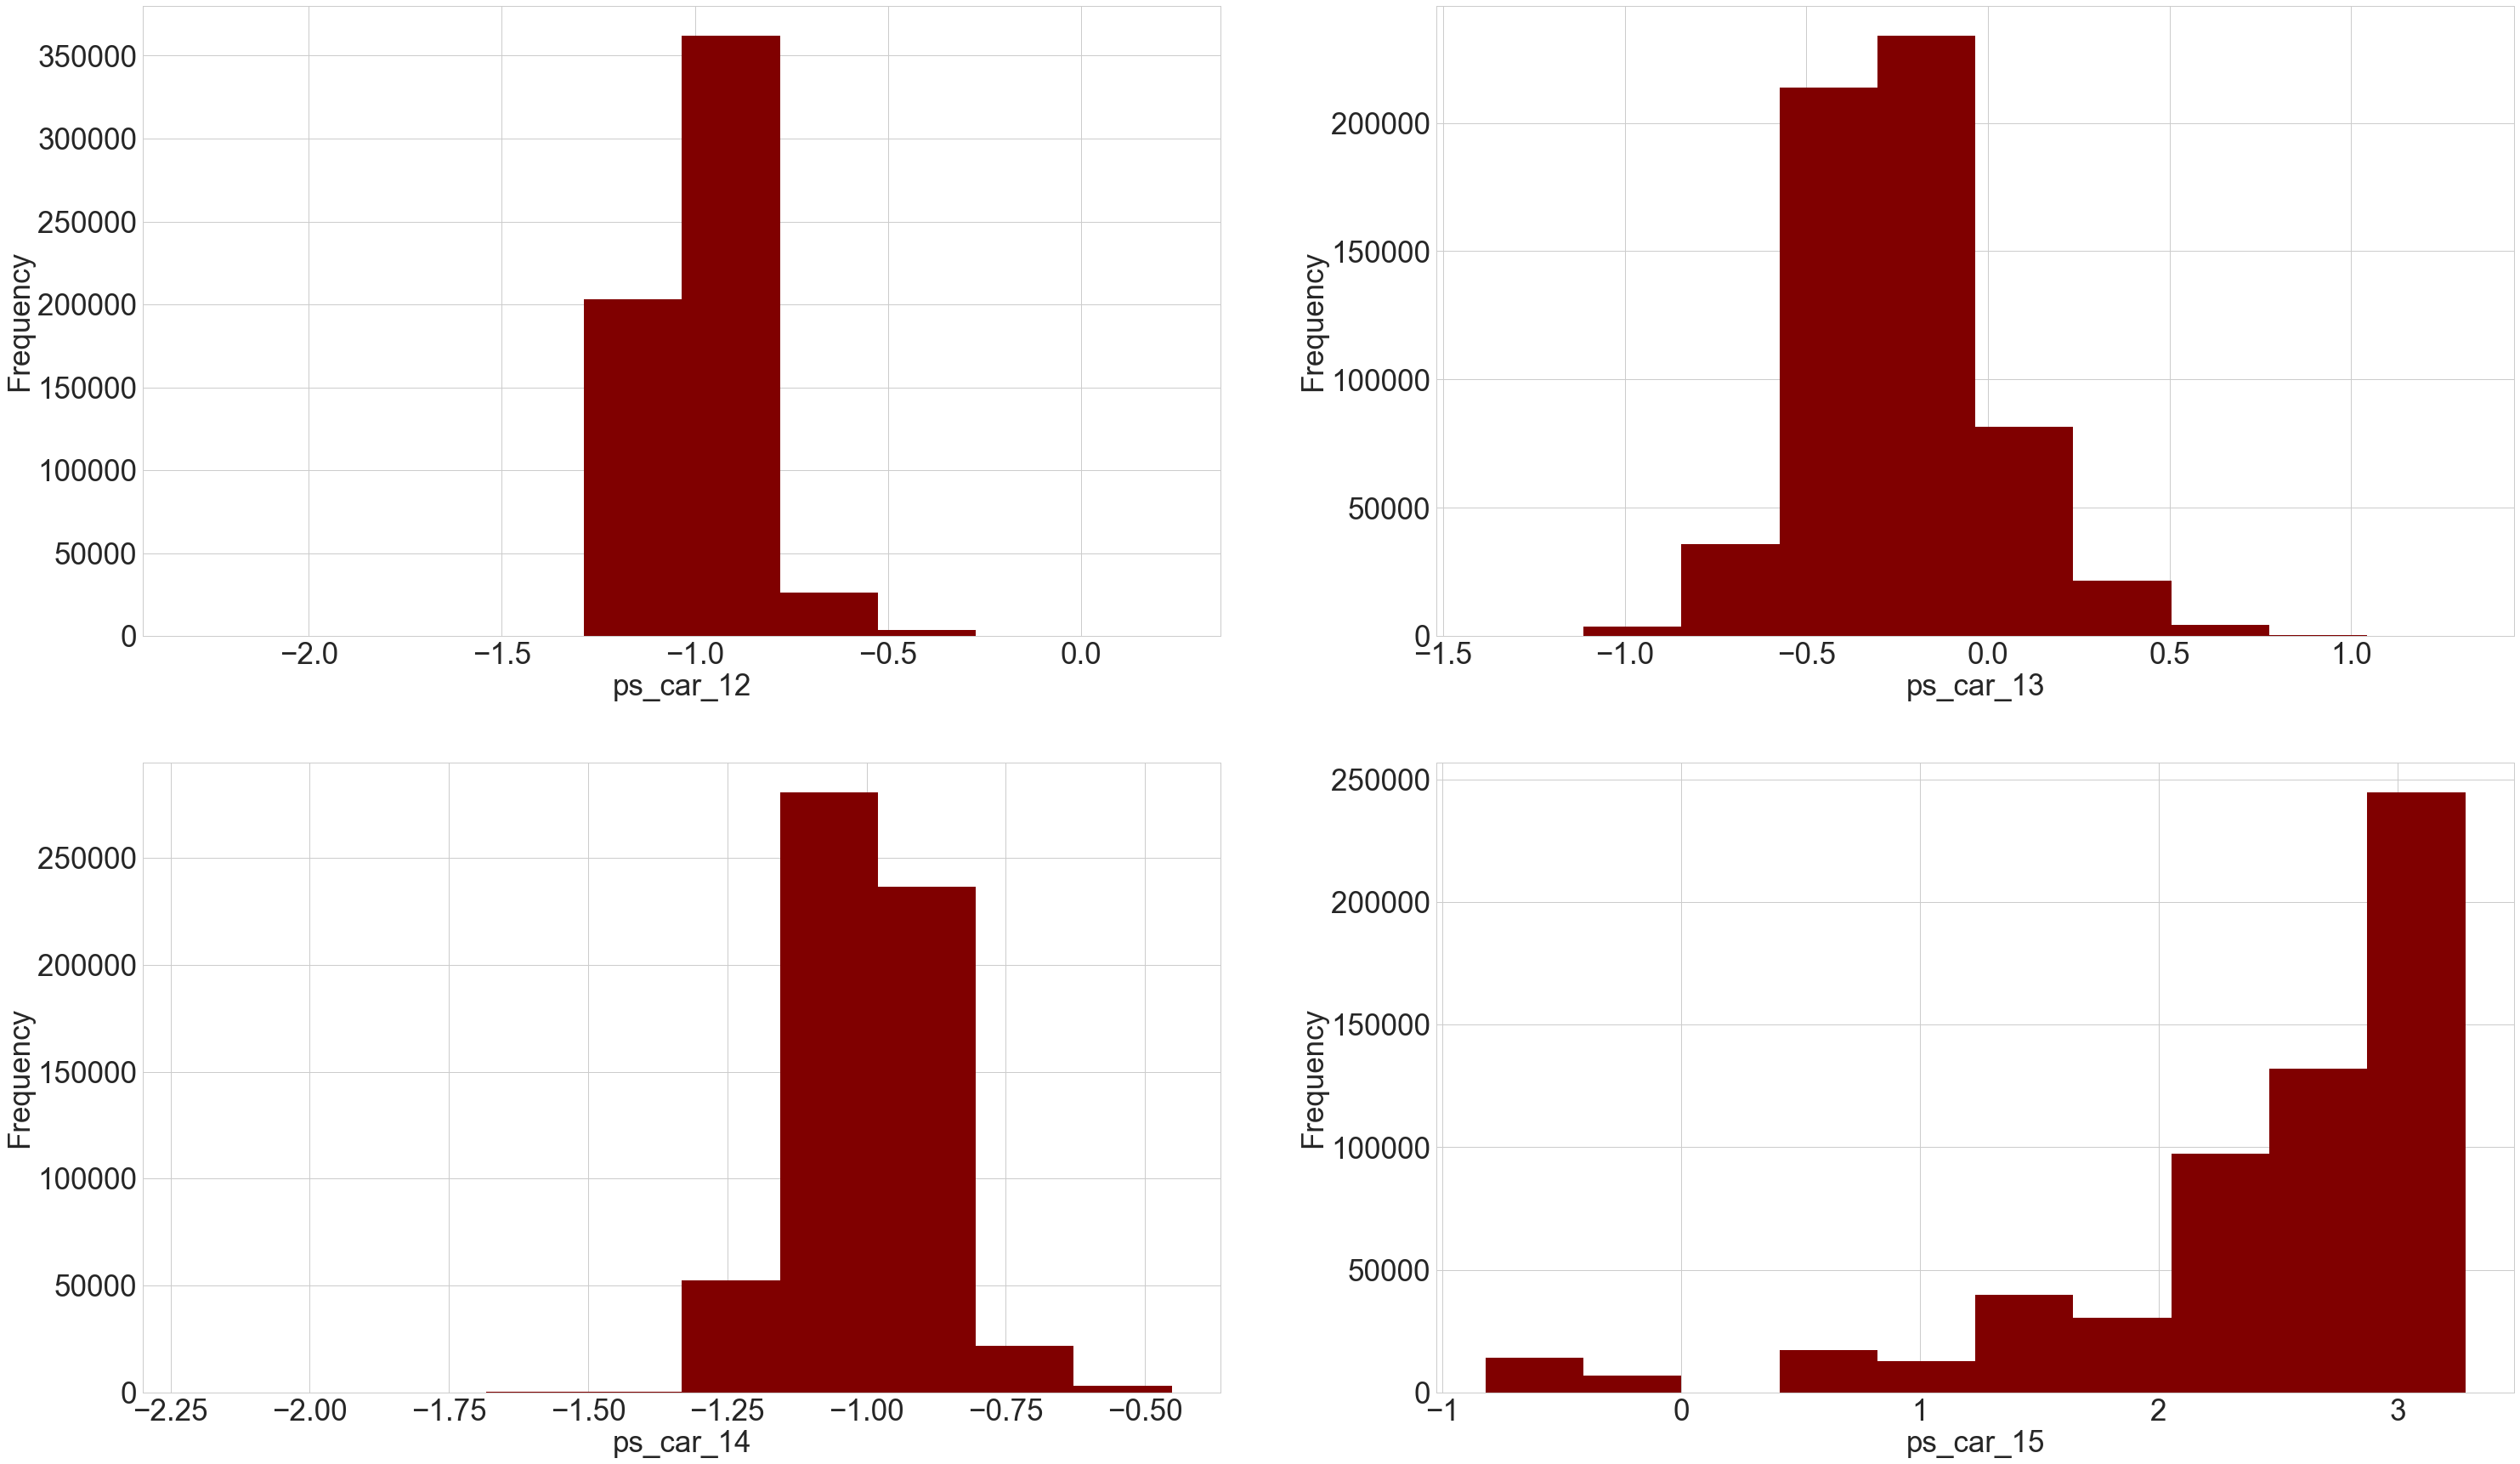

In [31]:
fig=plt.figure(figsize=(50,30))
for i, plot_vars in enumerate(new_con):
    ax=fig.add_subplot(2,2,i+1)
    plt.xlabel(plot_vars, fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    
    drivers[plot_vars].plot.hist(color="maroon",ax=ax)
    #print(counts)
plt.show()

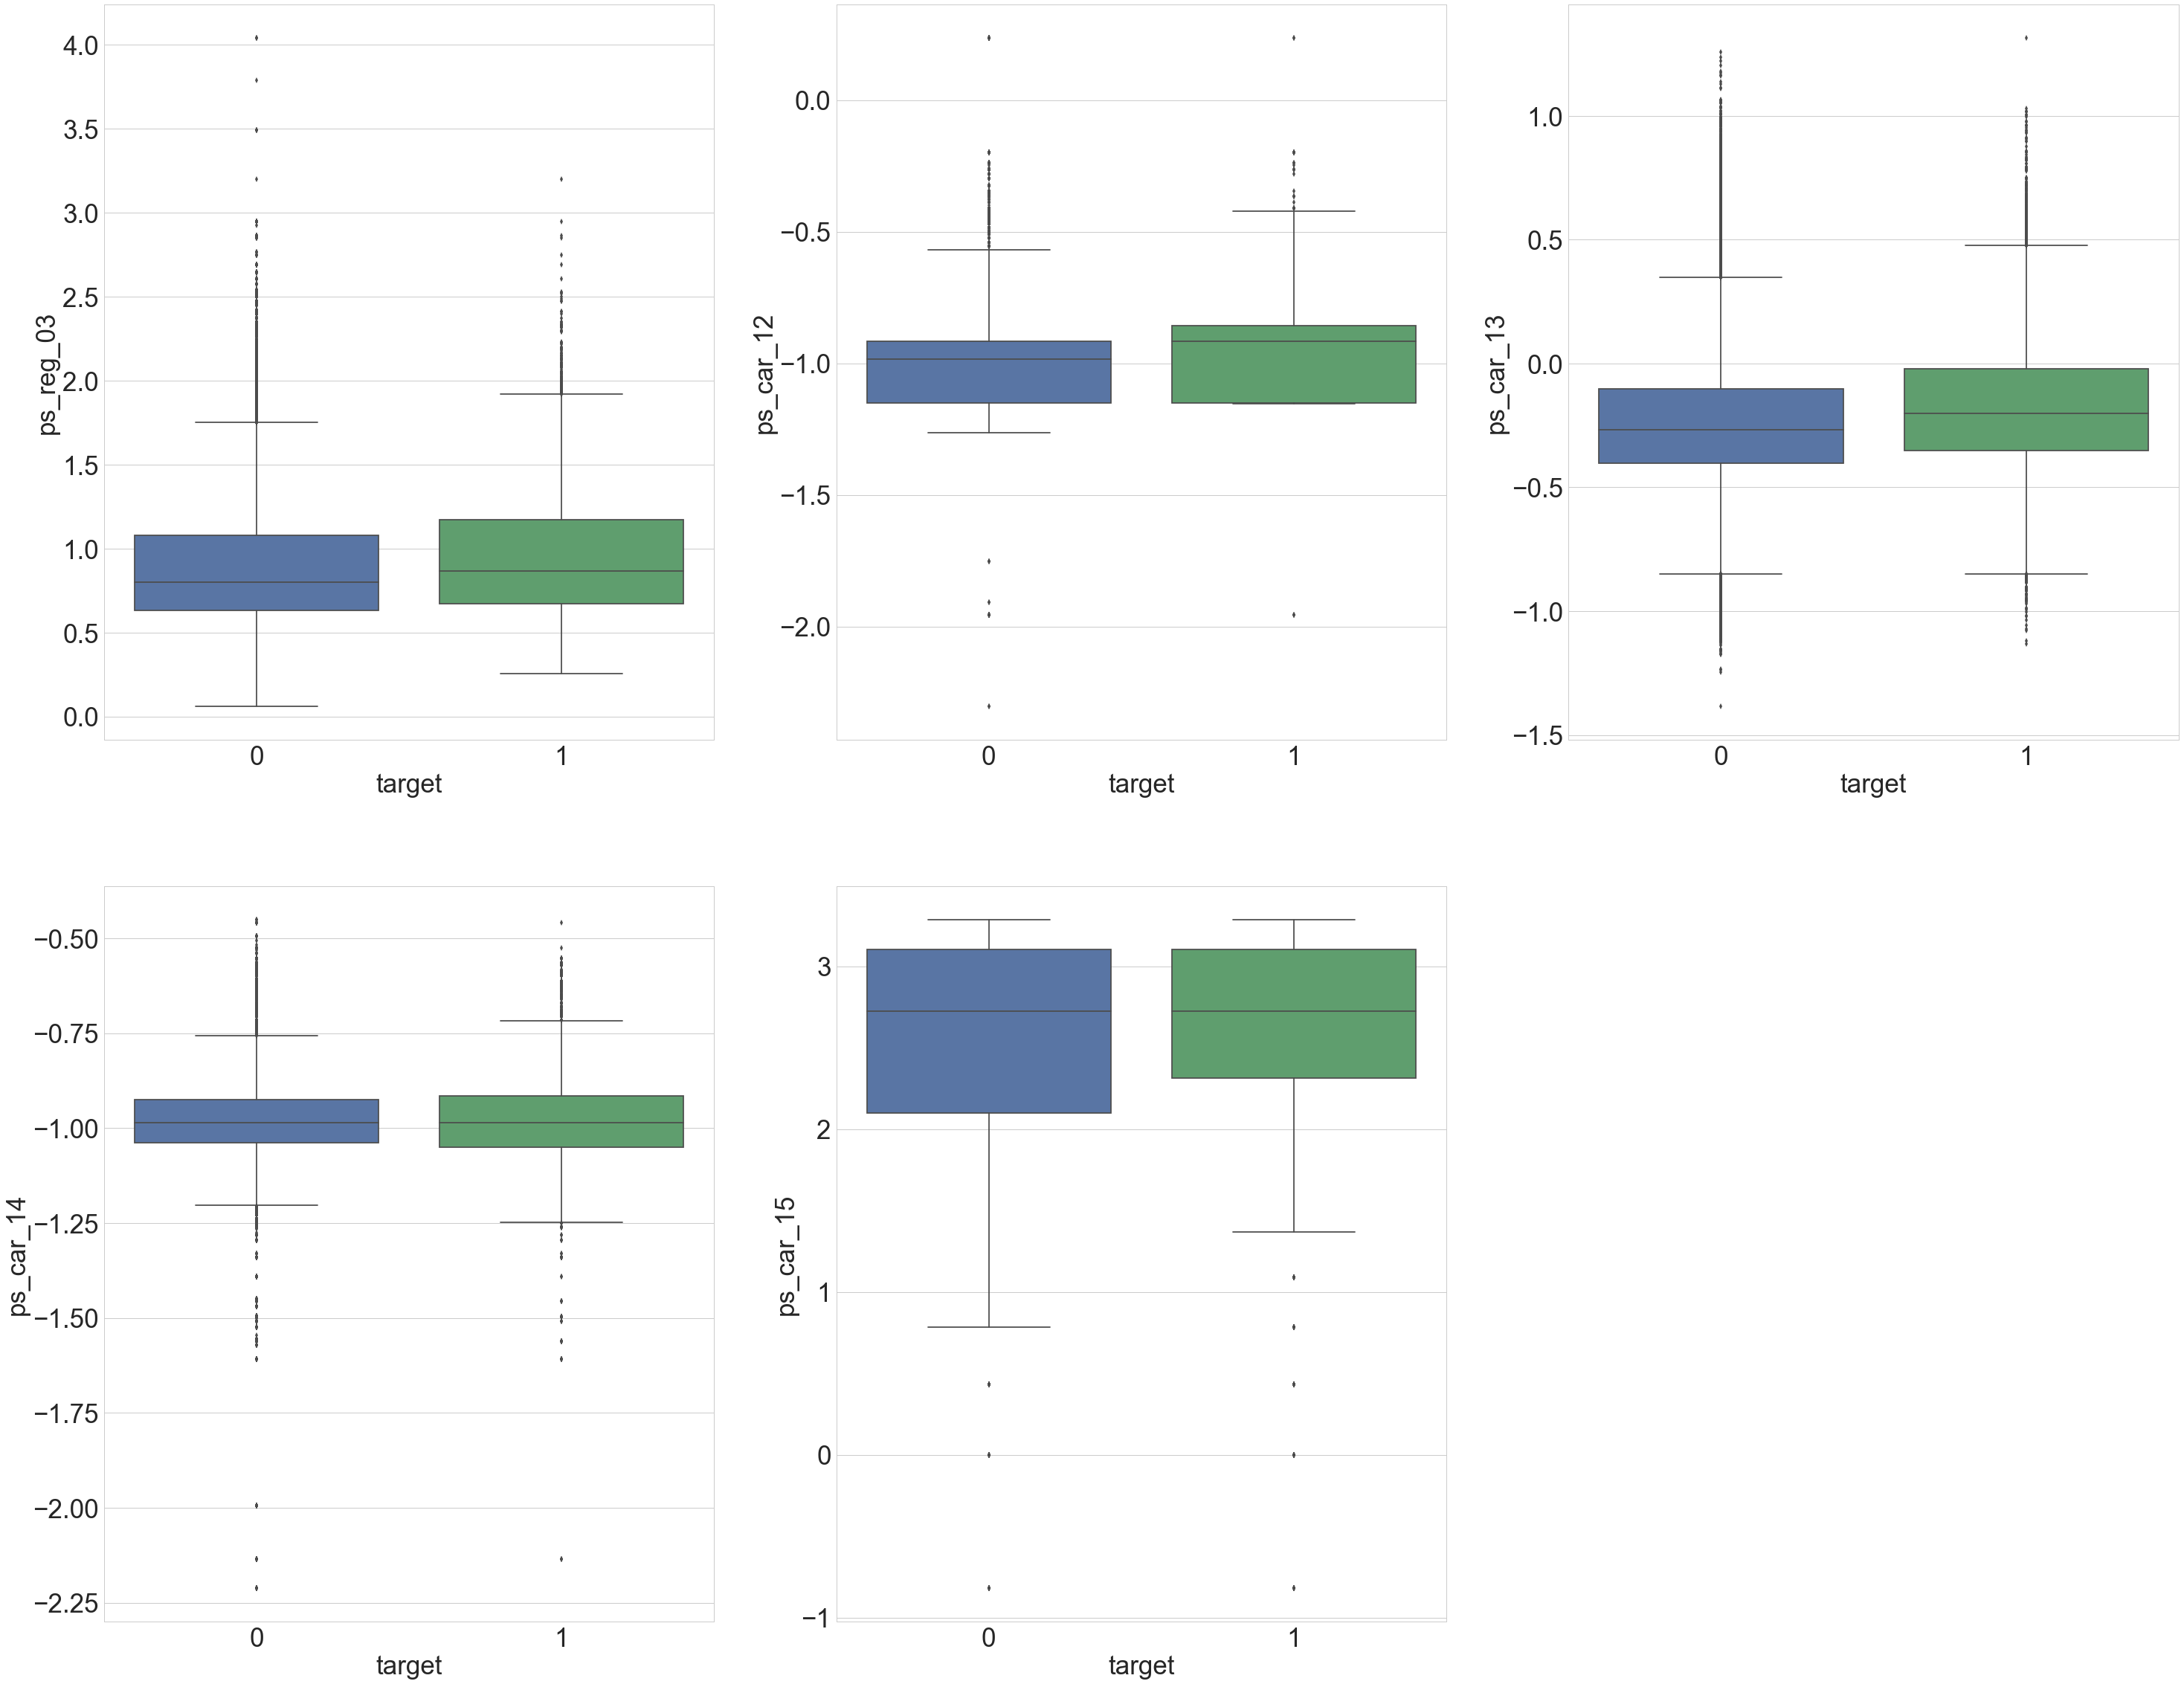

In [32]:
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    sns.boxplot(x="target", y=plot_vars, data=drivers)
plt.show()

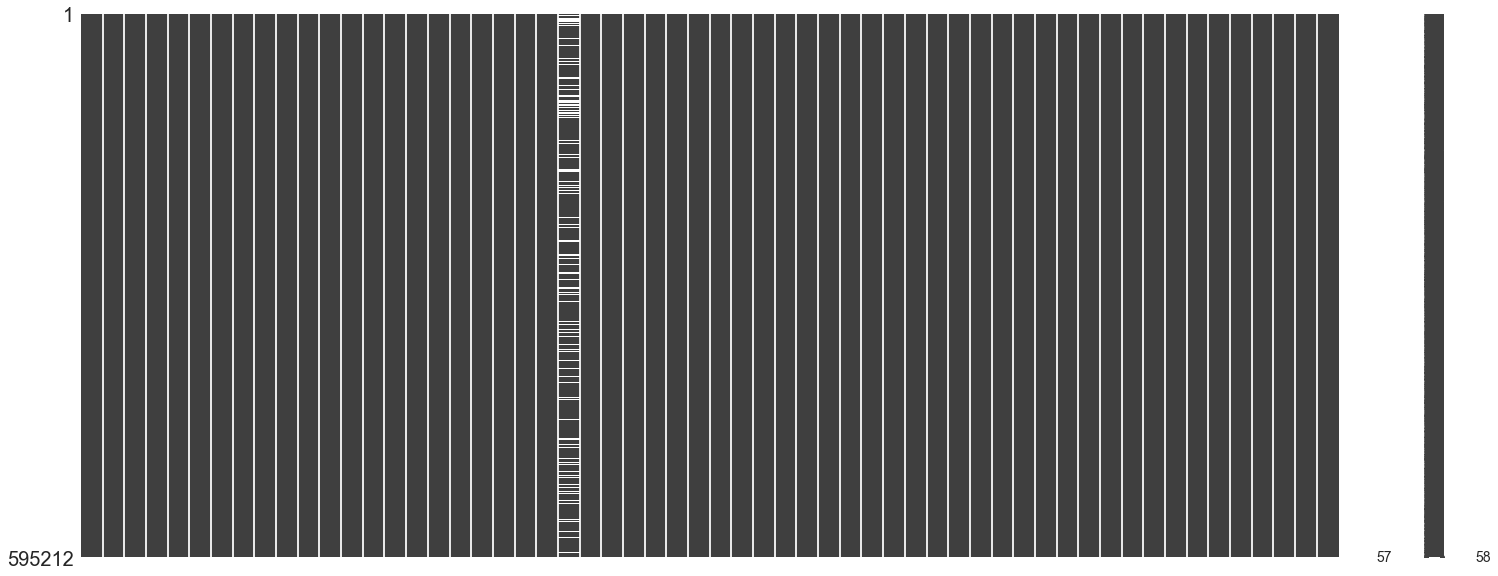

In [33]:
#lets Visualize the data one more time. Now we see that everything has been 
#imputed except ps_reg_03
msno.matrix(drivers)

## Regression to find the best imputation for variable <span style="color:brown">ps_reg_03</span>

At first we will break data on two data sets with missing values for variable and without

In [43]:
#let's break data set to where we have values for variable ps_reg_03 and where we don't have this values
change_type=['ps_ind_04_cat','ps_car_03_cat','ps_car_07_cat']
drivers[change_type]=drivers[change_type].convert_objects(convert_numeric=True)
driversLRG_missing=drivers.copy()
#data set to impute values
driversLRG_missing=driversLRG_missing[driversLRG_missing['ps_reg_03'].isnull()]
#test and train data set
driversLRG=drivers.copy()
driversLRG=driversLRG[driversLRG['ps_reg_03'].notnull()]

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


We will treat ordinal variables as categorical type for this task. Also, we will not use 'target' variable for prediction of <span style="color:brown; font-family:Consolas; font-size:1.1em">'ps_reg_03'</span>
 variable.

#### Let's make variables an appropriate type

In [44]:
#make the variables an apropriate type
new_binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat',
         'ps_car_07_cat', 'ps_car_08_cat']
for col in new_binary:
    drivers[col]=drivers[col].astype("category")
for col in cat:
    drivers[col]=drivers[col].astype("category")

In [45]:
toDummies=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
         'ps_car_07_cat', 'ps_car_08_cat',"ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
           "ps_car_09_cat",  "ps_car_10_cat","ps_car_11_cat",'ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
listToCopy=["ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]
driversLRG_wDummies=pd.concat([pd.get_dummies(driversLRG[col],prefix=col) for col in toDummies], axis=1)
driversLRG_wDummies = pd.concat((driversLRG_wDummies, driversLRG[listToCopy]), axis=1)
driversLRG_missing_wDummies=pd.concat([pd.get_dummies(driversLRG_missing[col],prefix=col) for col in toDummies], axis=1)
driversLRG_missing_wDummies = pd.concat((driversLRG_missing_wDummies, driversLRG_missing[listToCopy]), axis=1)

In [46]:
driversLRG_wDummies['ps_reg_03'][driversLRG_wDummies['ps_reg_03']==0]=0.000001
driversLRG_wDummies['ps_reg_03']=np.log(driversLRG_wDummies['ps_reg_03'])

In [47]:
if 'ps_reg_03' in driversLRG_wDummies:
    y = driversLRG_wDummies['ps_reg_03'].values 
    del driversLRG_wDummies['ps_reg_03'] #delete variable
    X = driversLRG_wDummies.values #values of all other variables

Because we have around 500k records we will split our data on 3 data sets - train, validation, test in proportion. Reservin for test 20% of data and for the training with cross-validation the rest 80% of data.

In [48]:
x_cv, x_reserved, y_cv, y_reserved = train_test_split(X,y,test_size=0.2,train_size=0.8)

### Partial least squares regression

Let's see how principle components explain variation in a data set.

In [49]:
#we'll choose 150 principal components.
from sklearn.cross_decomposition import PLSRegression
from sklearn import cross_validation
pls=PLSRegression(n_components=150, scale=False)
pls.fit(x_cv,y_cv)
scores = cross_validation.cross_val_score(pls, x_cv,y_cv, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard deviation:", rmse_scores.std())

c:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RMSE Mean: 0.224322178874
RMSE Standard deviation: 0.00134908584412


We will use method with the lowest RMSE to predict and impute the missing values for variable ps_reg_03.
The best method turned out to be PLS regression with 150 principle components. The RMSE from this method is 0.206

In [50]:
from math import sqrt
y_hat=pls.predict(x_reserved)
mean_sqrt=mean_squared_error(y_reserved, y_hat)
rms = sqrt(mean_sqrt)
print ("Mean squared error",mean_sqrt)
print ("RMSE",rms)

Mean squared error 0.0500916317787
RMSE 0.22381159884747304


Let's fit the whole data set without missing values for ps_reg_03 to predict and impute missing values.

But at first let's compare if both data sets have the same number of columns.

In [51]:
driversLRG_missing=drivers.copy()
#data set to impute values
driversLRG_missing=driversLRG_missing[driversLRG_missing['ps_reg_03'].isnull()]
#test and train data set
driversLRG=drivers.copy()
driversLRG=driversLRG[driversLRG['ps_reg_03'].notnull()]
toDummies=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
         'ps_car_07_cat', 'ps_car_08_cat',"ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
           "ps_car_09_cat",  "ps_car_10_cat","ps_car_11_cat",'ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
listToCopy=["ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]
driversLRG_wDummies=pd.concat([pd.get_dummies(driversLRG[col],prefix=col) for col in toDummies], axis=1)
driversLRG_wDummies = pd.concat((driversLRG_wDummies, driversLRG[listToCopy]), axis=1)
driversLRG_missing_wDummies=pd.concat([pd.get_dummies(driversLRG_missing[col],prefix=col) for col in toDummies], axis=1)
driversLRG_missing_wDummies = pd.concat((driversLRG_missing_wDummies, driversLRG_missing[listToCopy]), axis=1)

In [52]:
namesLRG=driversLRG_wDummies.columns.values
namesMiss=driversLRG_missing_wDummies.columns.values

In [53]:
#missing columns in driversLRG_wDummies
miss_col1=list(set(namesLRG) - set(namesMiss))
print(miss_col1)

['ps_calc_13_13', 'ps_calc_06_0', 'ps_calc_14_23', 'ps_calc_11_18', 'ps_calc_06_1', 'ps_calc_10_25', 'ps_calc_14_22', 'ps_calc_12_9', 'ps_calc_12_10']


In [54]:
#missing columns in driversLRG_missing_wDummies
miss_col2=list(set(namesMiss) - set(namesLRG))
print(miss_col2)

['ps_calc_11_19', 'ps_calc_10_24']


As we can see the number of columns doesn't match between two data sets. We'll delete unmatching columns from the data sets.

In [55]:
driversLRG_wDummies2=driversLRG_wDummies.copy()
driversLRG_wDummies2.drop(miss_col1,inplace=True, axis=1)

In [56]:
driversLRG_missing_wDummies2=driversLRG_missing_wDummies.copy()
driversLRG_missing_wDummies2.drop(miss_col2,inplace=True, axis=1)

In [57]:
if 'ps_reg_03' in driversLRG_wDummies2:
    y_2 = driversLRG_wDummies2['ps_reg_03'].values 
    del driversLRG_wDummies2['ps_reg_03'] 
    X_2 = driversLRG_wDummies2.values 
if 'ps_reg_03' in driversLRG_missing_wDummies2:
    y_miss = driversLRG_missing_wDummies2['ps_reg_03'].values 
    del driversLRG_missing_wDummies2['ps_reg_03'] 
    X_miss = driversLRG_missing_wDummies2.values 

In [58]:
plse_full=pls.fit(X_2,y_2)
y_hat=pls.predict(X_miss)

Let's impute the ps_reg_03 with predicted values.

In [59]:
y_frame=pd.DataFrame(data=y_hat,columns=["ps_reg_03"])

In [60]:
%%time
#contacenate this variable to the driversLRG_missing
driversLRG_missing.drop('ps_reg_03',inplace=True,axis=1)
driversLRG_missing=pd.concat((driversLRG_missing,y_frame),axis=1,join="inner")

Wall time: 364 ms


In [61]:
%%time
#create final data frame with target variable
drivers2=pd.concat((driversLRG,driversLRG_missing))
drivers2.drop('id',axis=1,inplace=True)

Wall time: 455 ms


In [62]:
%%time
to_cat=['ps_car_03_cat','ps_car_11_cat']
for cat in to_cat:
    drivers2[cat].astype("category")

Wall time: 57.2 ms


In [63]:
%%time
missVal=drivers2.isnull().sum()*100/len(drivers2)
missVal.iloc[missVal.nonzero()]

Wall time: 538 ms


## Feature selection for classification

Let's choose features which have statistically significant variation across categories of target variable.

In [64]:
%%time
from sklearn.feature_selection import chi2, VarianceThreshold
list_to_check=['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat','ps_ind_01',
       'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02']
matrix_to_check=drivers2[list_to_check].values
y=drivers2['target'].values
selection=chi2(X=matrix_to_check,y=y)
p_value=selection[1]
for value, feature in zip(p_value, list_to_check):
    print(feature,"p-value: ",value)

ps_calc_01 p-value:  0.515024736959
ps_calc_02 p-value:  0.967960624091
ps_calc_03 p-value:  0.503085800947
ps_calc_04 p-value:  0.746464695081
ps_calc_05 p-value:  0.685668030912
ps_calc_06 p-value:  0.886144311708
ps_calc_07 p-value:  0.708168889899
ps_calc_08 p-value:  0.861564846546
ps_calc_09 p-value:  0.952287884075
ps_calc_10 p-value:  0.677868220528
ps_calc_11 p-value:  0.891964607149
ps_calc_12 p-value:  0.277582485961
ps_calc_13 p-value:  0.773665165886
ps_calc_14 p-value:  0.0783047630277
ps_calc_15_bin p-value:  0.528506079888
ps_calc_16_bin p-value:  0.667110985528
ps_calc_17_bin p-value:  0.920205001429
ps_calc_18_bin p-value:  0.943381562484
ps_calc_19_bin p-value:  0.405675158744
ps_calc_20_bin p-value:  0.360686103258
ps_car_01_cat p-value:  7.70825926234e-22
ps_car_02_cat p-value:  5.94173317558e-20
ps_car_03_cat p-value:  3.18312930823e-22
ps_car_04_cat p-value:  0.0
ps_car_06_cat p-value:  1.14898526324e-52
ps_car_07_cat p-value:  0.00451632660971
ps_car_08_cat p-va

In [65]:
%%time
#let's choose only statistically significant features
feature_list=[]
for value, feature in zip(p_value, list_to_check):
    if value<0.05:
        feature_list.append(feature)
print ("Selected features:")
print(feature_list)
print ("Number original features: ",len(list_to_check))
print("Number selected features: ",len(feature_list))

Selected features:
['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02']
Number original features:  51
Number selected features:  24
Wall time: 0 ns


In [66]:
%%time
X=drivers2[feature_list].values

Wall time: 280 ms


# Classification

## Option A: Cluster Analysis

Because we have about 600k observations, we'll reserve 20% of data for testing and 80% data for model building with cross validation.

In [67]:
%%time
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

Wall time: 813 ms


### Let's try to reduce dimensionality of data by clustering some features

The values with the same prefix come from the same group. This way we have following groups :<br><br>
Group 1: <span style="color:brown; font-family:Consolas; font-size:1.1em">'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',    'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',    'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'</Span><br>

Group 2: <span style="color:brown; font-family:Consolas; font-size:1.1em">'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat','ps_car_08_cat',  'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'</span><br>

Group 3: <span style="color:brown; font-family:Consolas; font-size:1.1em">'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin'</span><br>

Group 4: <span style="color:brown; font-family:Consolas; font-size:1.1em">'ps_reg_01', 'ps_reg_02', 'ps_reg_03'</span>


#### Let's try K-modes cluster

This clustering technique was specially developed for categorical data which we have right now. This algorithm to measure similarity compares two categorical values. If they are identical it gives a value zero otherwise it gives a value one.  
http://www.cs.ust.hk/~qyang/Teaching/537/Papers/huang98extensions.pdf

Let's try to create clusters for the first set of features

In [68]:
%%time
names=drivers2[feature_list].columns.values
df_rf_train = pd.DataFrame(data=x_train,columns=names)
df_rf_test = pd.DataFrame(data=x_test,columns=names)

Wall time: 725 ms


In [69]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Create a list of feature names
feat_labels = drivers2.columns.values

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid={'max_depth':[3,5,8,10,14]}

Wall time: 4.64 s


In [75]:
%%time
from sklearn.linear_model import LogisticRegression
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
clf=LogisticRegression(class_weight="balanced",n_jobs=-1)
grid={'solver':['lbfgs','liblinear'],'C':[0.0001,0.1,1,10,100]}
gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
fitted=gs.fit(x_train, y_train)
f1=gs.best_score_
f1

In [71]:
%%time
gs.best_params_

Wall time: 0 ns


{'C': 0.1, 'solver': 'lbfgs'}

As we can see, the F1 - score didn't improved. Now, let's try to create 4 clusters and find optimum amount of clusters. And see if it improves F1 - score.

## Look for the best number of clusters

We will create function which will iterate through the list of clusters and print out the best f1-score achived and number of clusters associated with it. Using this function we will narrow the choice of the number of clusters to the number of clusters with the best f1-score achived using logistic regression.

In [72]:
%%time
#clustering with selected features
X1_train=df_rf_train[['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
             'ps_car_08_cat',  'ps_car_09_cat', 'ps_car_11_cat']]
X2_train=df_rf_train[['ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
             'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin','ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin']]
X3_train=df_rf_train[['ps_reg_01', 'ps_reg_02']]

Wall time: 283 ms


In [74]:
%%time
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from kmodes.kmodes import KModes

#takes as input the 3 lists containing number of clusters we want to try
def bestCluster (clust1,clust2,clust3):
    %%time
    f1_list=[]
    num_clusters_all=[]
    for num_clusters1 in clust1:
        for num_clusters2 in clust2:
            for num_clusters3 in clust3:
                num_clusters=[]
                #first clustering
                cls = KModes(n_clusters=num_clusters1, init='Huang',verbose=0)
                newfeature1=cls.fit_predict(X1_train)
                num_clusters.append(num_clusters1)
                #second clustering
                cls = KModes(n_clusters=num_clusters2, init='Huang',verbose=0)
                newfeature2=cls.fit_predict(X2_train)
                num_clusters.append(num_clusters2)
                #third clustering
                cls = KModes(n_clusters=num_clusters3, init='Huang',verbose=0)
                newfeature3=cls.fit_predict(X3_train)
                num_clusters.append(num_clusters3)
                #get one data set
                X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3)))
                gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
                fitted=gs.fit(X, y_train)
                f1=gs.best_score_
                f1_list.append(f1)
                #append clusters of the iteration
                num_clusters_all.append(num_clusters)
        print('Round ',num_clusters1,' is done.')
    max_f1=max(f1_list)
    max_index = f1_list.index(max_f1)
    print('Max F1-score: ', max_f1)
    print(max_index)
    print("Number of clusters chosen for Group 1: ", num_clusters_all[max_index][0])
    print("Number of clusters chosen for Group 2: ", num_clusters_all[max_index][1])
    print("Number of clusters chosen for Group 3: ", num_clusters_all[max_index][2])

Wall time: 4.01 ms


### Iteration 1

Let's see if we get different F1-score with different number of clusters.

In [66]:
%%time
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from kmodes.kmodes import KModes

f1_list=[]
num_clusters_all=[]
clusters=[10,20,30,40]
#clusters=[2,3]
clust3=[10,20]
for num_clusters1 in clusters:
    for num_clusters2 in clusters:
        for num_clusters3 in clust3:
            num_clusters=[]
            #first clustering
            cls = KModes(n_clusters=num_clusters1, init='Huang',verbose=0)
            newfeature1=cls.fit_predict(X1_train)
            num_clusters.append(num_clusters1)
            #second clustering
            cls = KModes(n_clusters=num_clusters2, init='Huang',verbose=0)
            newfeature2=cls.fit_predict(X2_train)
            num_clusters.append(num_clusters2)
            #third clustering
            cls = KModes(n_clusters=num_clusters3, init='Huang',verbose=0)
            newfeature3=cls.fit_predict(X3_train)
            num_clusters.append(num_clusters3)
            #get one data set
            X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3)))
            gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
            fitted=gs.fit(X, y_train)
            f1=gs.best_score_
            f1_list.append(f1)
            #append clusters of the iteration
            num_clusters_all.append(num_clusters)
    print('Round ',num_clusters1,' is done.')

Round  10  is done.
Round  20  is done.
Round  30  is done.
Round  40  is done.
Wall time: 5h 27min 26s


In [67]:
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print(max_index)
print("Number of clusters chosen for Group 1: ", num_clusters_all[max_index][0])
print("Number of clusters chosen for Group 2: ", num_clusters_all[max_index][1])
print("Number of clusters chosen for Group 3: ", num_clusters_all[max_index][2])
print ('F1-scores: ',f1_list)

29
Number of clusters chosen for Group 1:  40
Number of clusters chosen for Group 2:  30
Number of clusters chosen for Group 3:  20
F1-scores:  [0.086255407219642838, 0.089167673593669033, 0.088493762977467499, 0.088938056302649296, 0.089939826867346945, 0.089952700957640047, 0.09075986120384065, 0.08943104583238623, 0.088230184096149217, 0.089390474952723842, 0.088171936118882716, 0.090484013429229571, 0.088934723507008859, 0.08956200892937935, 0.088758362046618369, 0.09033203346553062, 0.08969928037673687, 0.089346671557352153, 0.087356527311275467, 0.09090996647554539, 0.089125025772398309, 0.090240668703004193, 0.089685125462510618, 0.089932149705983275, 0.086737980690275926, 0.089089502496298933, 0.088452225476438759, 0.089293154066931196, 0.088865773868869388, 0.091001152012232328, 0.089585428722828042, 0.090919103132916942]


We can see that F1-score doesn't significantly differ between different number of clusters. So we can't use this measure to determine the best number of clusters. So let's use different technique to determine the best number of clusters.

We will visualize our data with t-Distributed Stochastic Neighbor Embedding (t-SNE) to determine the best number of clusters. It will project data in 2-dimensional space and will do a good job in preserving cluster structure. We will use Hamming distance metric for similarity calculations. We will use 25% of data to do this. We believe it will preserve the data structure and save some time, becuase the big O of barnes-hut-tsne is NlogN and our full data contains roughly half a million of records.

In [68]:
%%time
from sklearn.manifold import TSNE

dimReduction=TSNE(metric='hamming')
reduced1=dimReduction.fit_transform(X1_train)

Wall time: 5h 35min 8s


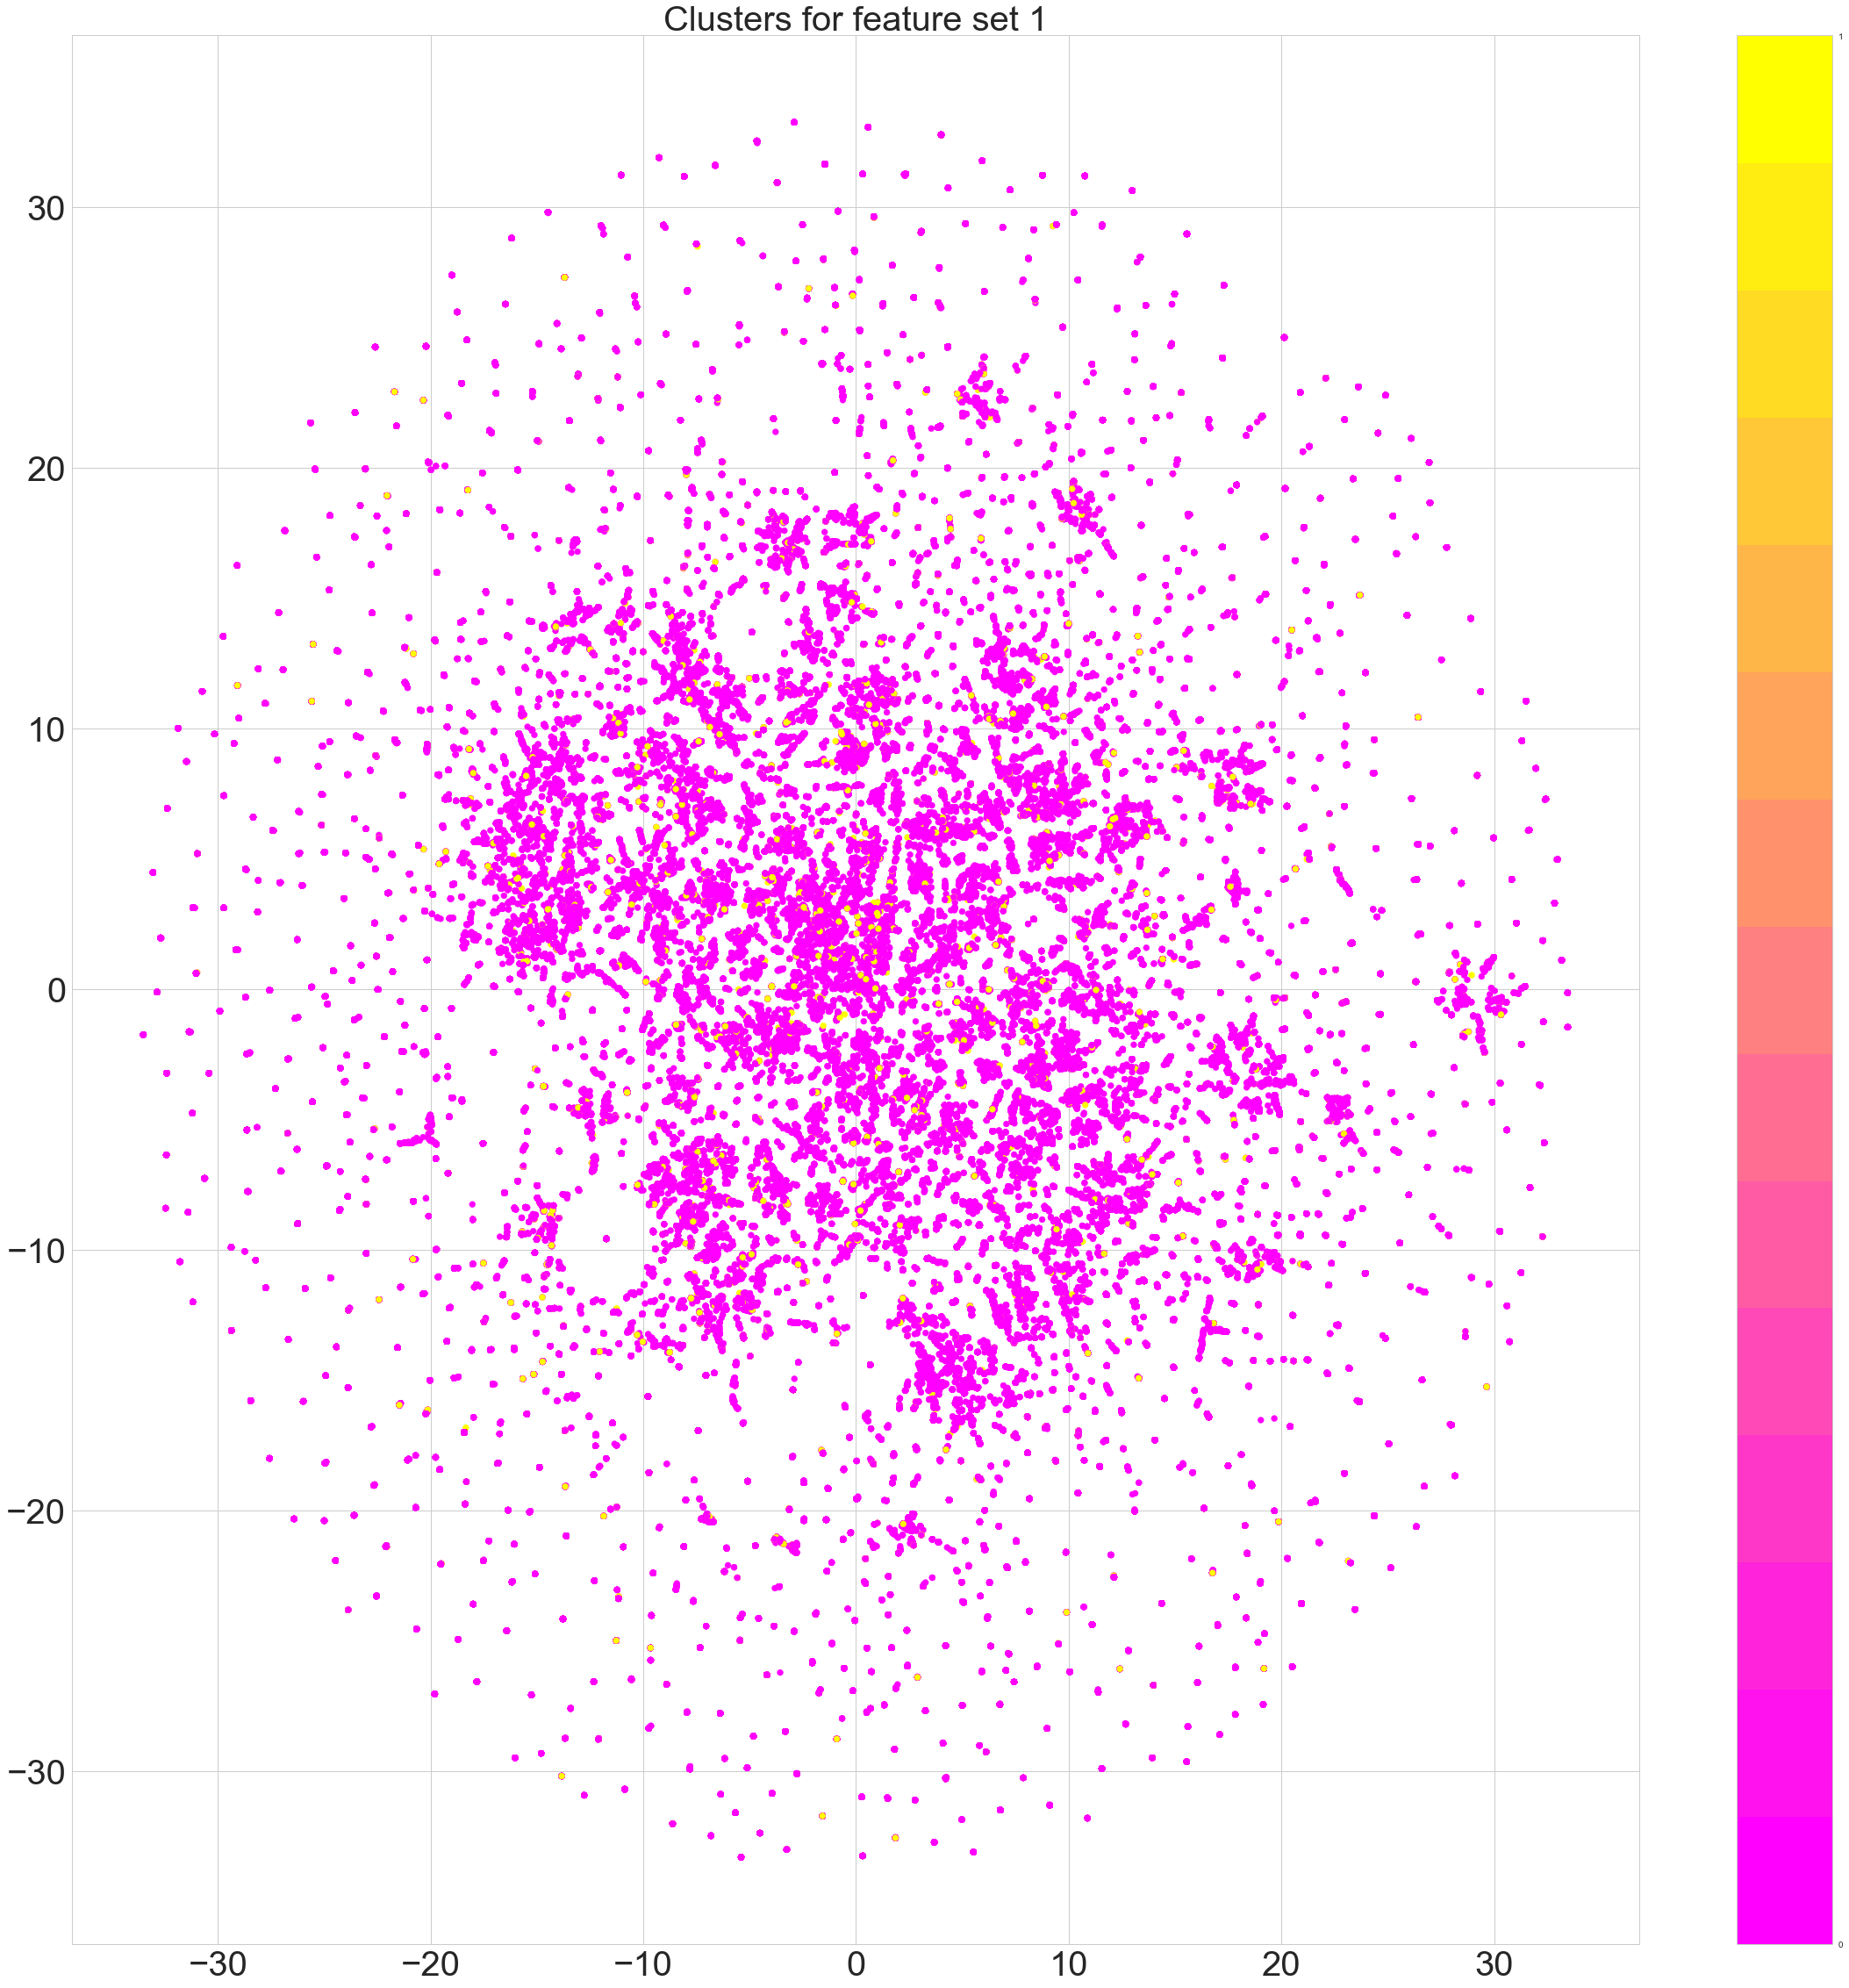

Wall time: 17.8 s


In [89]:
%%time
vis_x = reduced1[:, 0]
vis_y = reduced1[:, 1]
plt.figure(figsize=(40,40))
plt.title('Clusters for feature set 1', size=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.scatter(vis_x, vis_y, c=y_train, cmap=plt.cm.get_cmap("spring", 15))
plt.colorbar(ticks=range(10))
plt.show()

This is hard to define how many cluster there shall be. It's really fuzzy. We think that about 20 clusters shall define this feature set in a decent way.

In [70]:
%%time
reduced2=dimReduction.fit_transform(X2_train)

Wall time: 7h 20min 17s


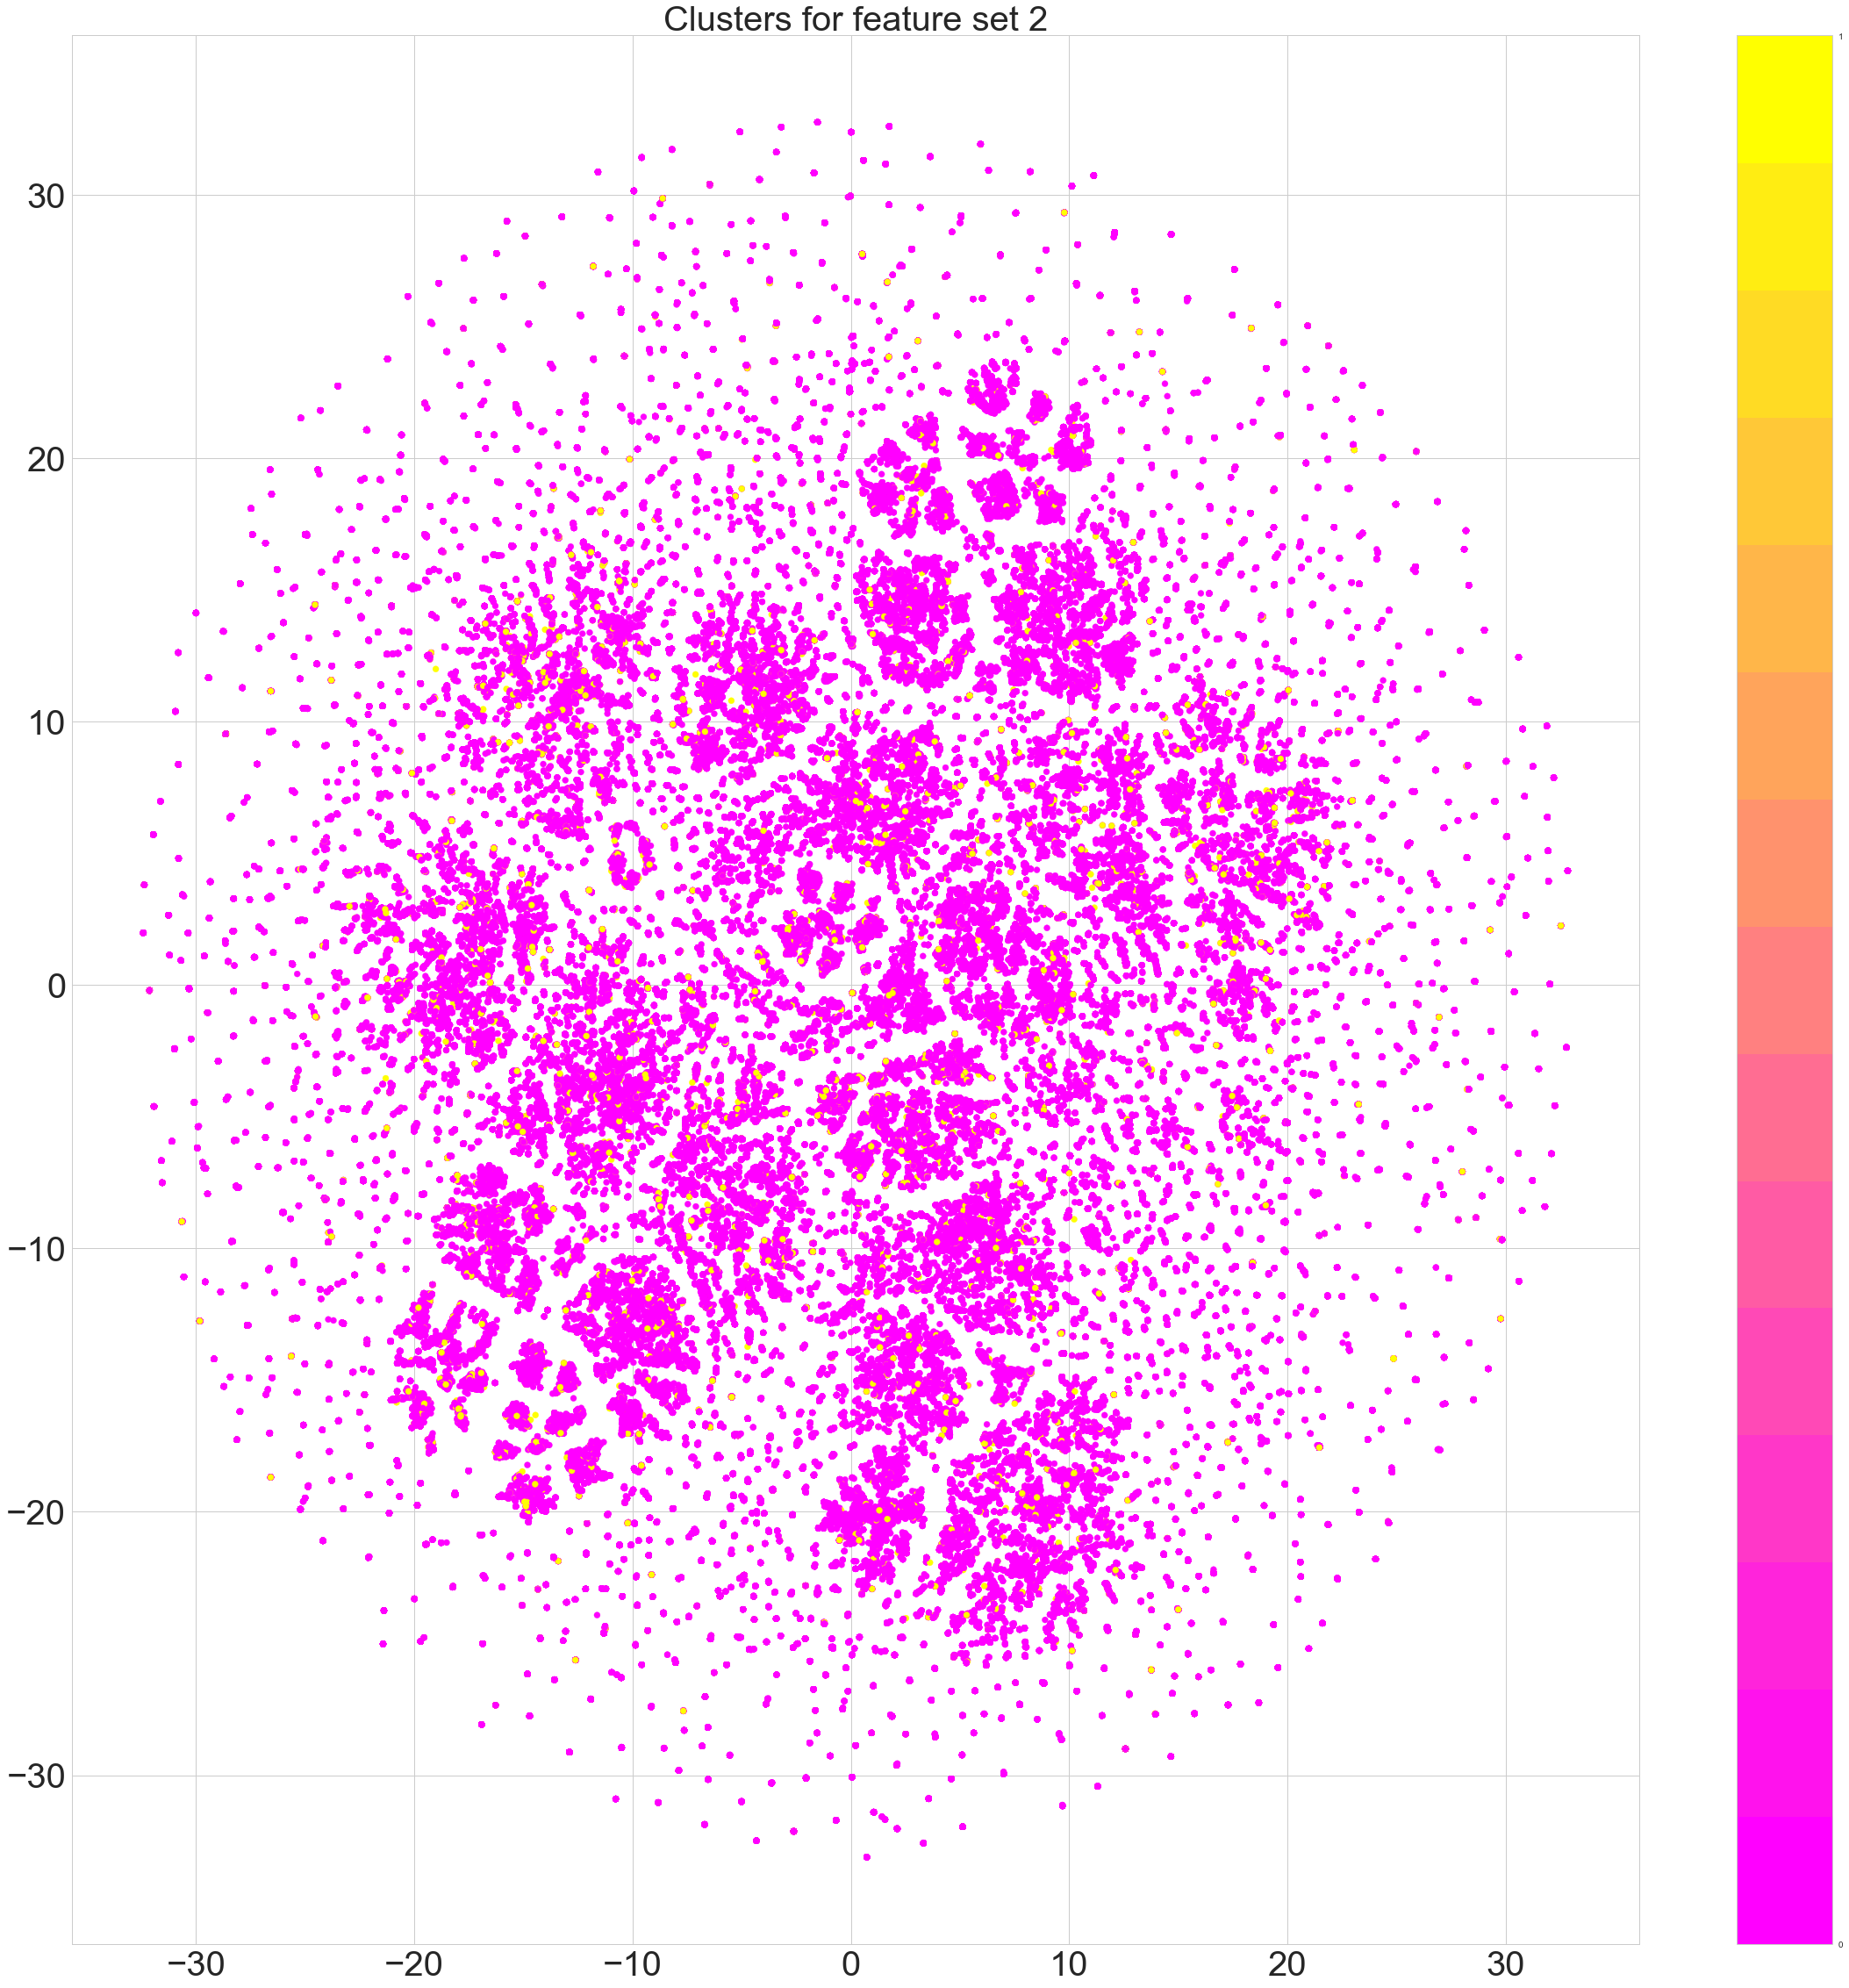

Wall time: 18.2 s


In [88]:
%%time
vis_x2 = reduced2[:, 0]
vis_y2 = reduced2[:, 1]
plt.figure(figsize=(40,40))
plt.title('Clusters for feature set 2', size=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.scatter(vis_x2, vis_y2, c=y_train, cmap=plt.cm.get_cmap("spring", 15))
plt.colorbar(ticks=range(10))
plt.show()

On the plot above we can define about 23 fuzzy clusters and many outliers.

In [71]:
%%time
reduced3=dimReduction.fit_transform(X3_train)

Wall time: 4h 30min 52s


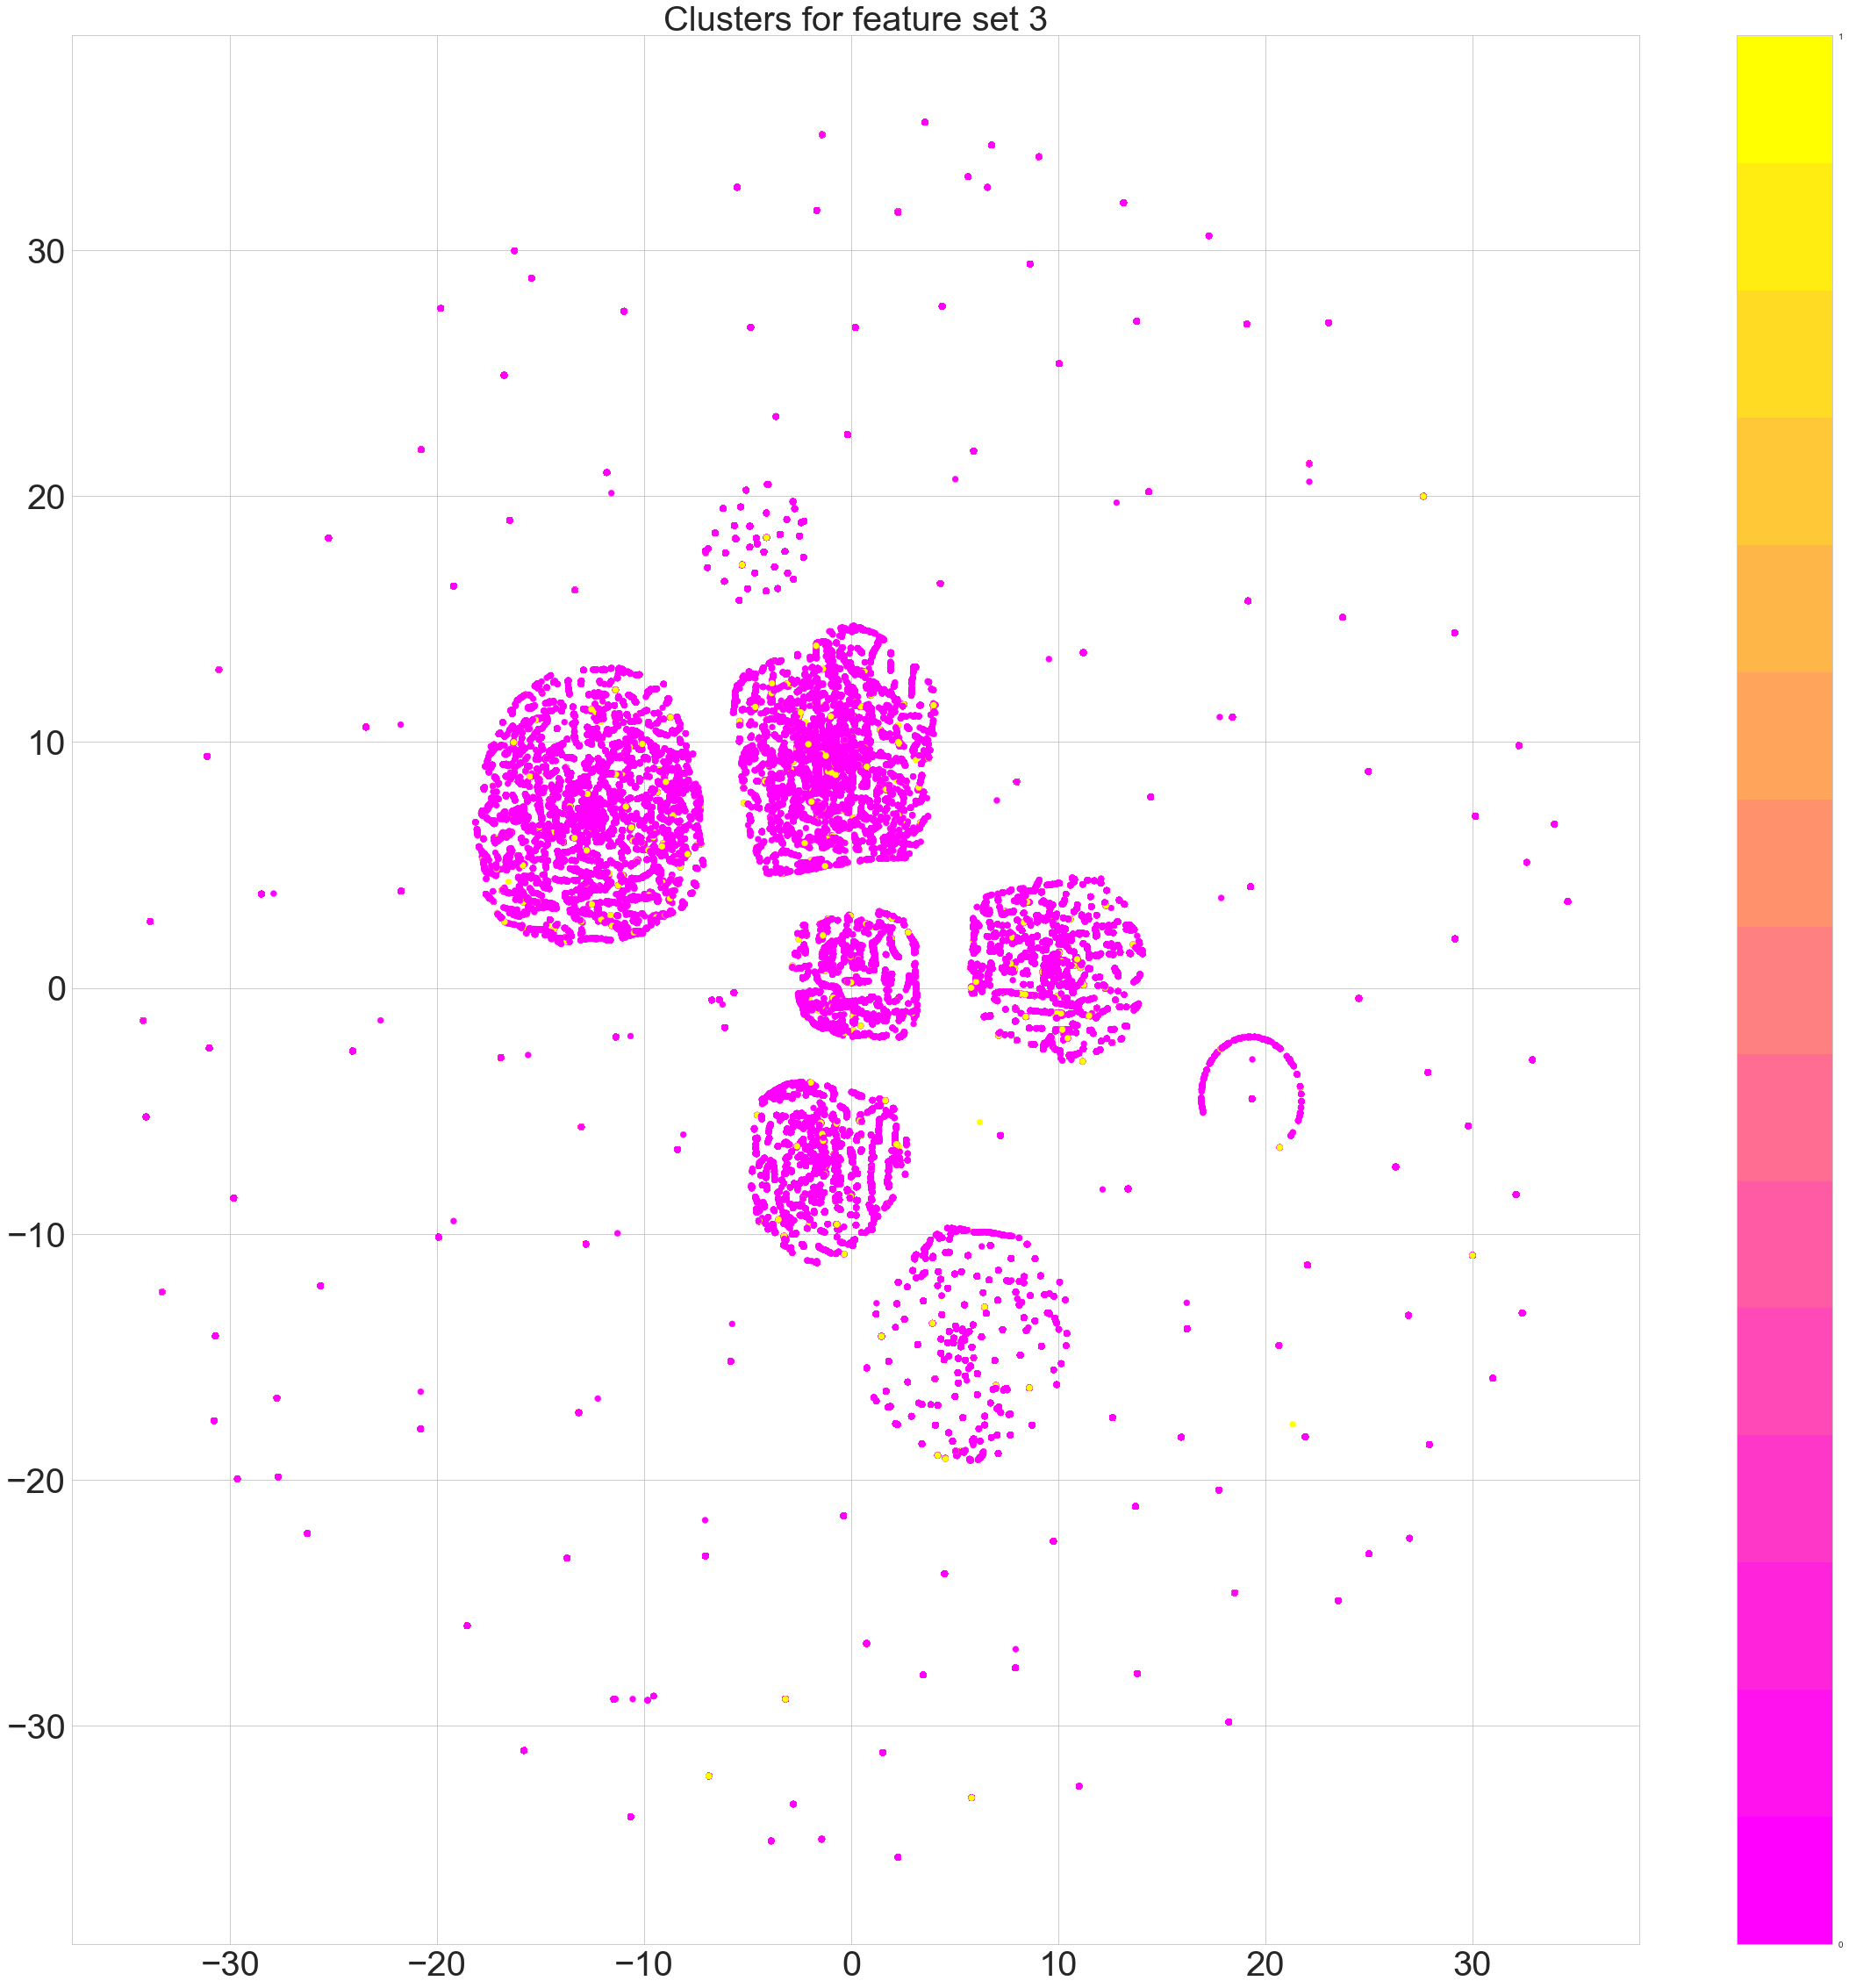

Wall time: 17.9 s


In [87]:
%%time
vis_x3 = reduced3[:, 0]
vis_y3 = reduced3[:, 1]
plt.figure(figsize=(40,40))
plt.title('Clusters for feature set 3', size=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.scatter(vis_x3, vis_y3, c=y_train, cmap=plt.cm.get_cmap("spring", 15))
plt.colorbar(ticks=range(10))
plt.show()

On the plot above we can see about 8 well defined clusters and many outliers.

We have chosen 20 clusters for set 1, 23 clustsers for feature set 2 and 8 clusters for feature set 3. We will initialize clusters centers 40 times to get more precize centers.

In [ ]:
from kmodes.kmodes import KModes
cls = KModes(n_clusters=20, init='Huang',n_init=40, verbose=0)
newfeature1=cls.fit_predict(X1_train)
#second clustering
cls = KModes(n_clusters=23, init='Huang', n_init=40, verbose=0)
newfeature2=cls.fit_predict(X2_train)
#third clustering
cls = KModes(n_clusters=8, init='Huang', n_init=40, verbose=0)
newfeature3=cls.fit_predict(X3_train)

#X_kmodes_dummies= np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3)))
X_kmodes=np.column_stack((newfeature1,newfeature2,newfeature3))
gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
fitted=gs.fit(X_kmodes, y_train)
f1=gs.best_score_
print(f1)

## Average silhouette method 

In [79]:
#https://plot.ly/scikit-learn/plot-kmeans-silhouette-analysis/
from sklearn.metrics import silhouette_score 
figures = []
range_n_clusters
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = tools.make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 ut in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, len(X) + (n_clusters + 1) * 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    colors = 'rgb'+str(colors)
    clusters = go.Scatter(x=X[:, 0], 
                          y=X[:, 1], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=colors,
                                     size=4)
                         )
    fig.append_trace(clusters, 1, 2)
    
    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = go.Scatter(x=centers_[:, 0], 
                         y=centers_[:, 1],
                         showlegend=False,
                         mode='markers',
                         marker=dict(color='green', size=10,
                                     line=dict(color='black',
                                                             width=1))
                        )

    fig.append_trace(centers, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    
    figures.append(fig)

## K-Means Final

In [155]:
cls = MiniBatchKMeans(n_clusters=34, init='k-means++',random_state=1)
cls.fit(X1_train)
KMeans1 = cls.labels_ 
#second clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X2_train)
KMeans2 = cls.labels_ 
#third clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X3_train)
KMeans3 = cls.labels_ 
cls = MiniBatchKMeans(n_clusters=6, init='k-means++',random_state=1)
cls.fit(X4_train)
KMeans4 = cls.labels_
X_kmeans_dummies= np.column_stack((pd.get_dummies(KMeans1),pd.get_dummies(KMeans2),pd.get_dummies(KMeans3),
            pd.get_dummies(KMeans4),df_rf_train[contin]))
X_kmeans=np.column_stack((KMeans1,KMeans2,KMeans3,KMeans4,df_rf_train[contin]))

## K-Means Test

In [189]:
cls = MiniBatchKMeans(n_clusters=34, init='k-means++',random_state=1)
cls.fit(X1_test)
KMeans1_test = cls.labels_ 
#second clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X2_test)
KMeans2_test = cls.labels_ 
#third clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X3_test)
KMeans3_test = cls.labels_ 
cls = MiniBatchKMeans(n_clusters=6, init='k-means++',random_state=1)
cls.fit(X4_test)
KMeans4_test = cls.labels_
X_kmeans_dummies_test= np.column_stack((pd.get_dummies(KMeans1_test),pd.get_dummies(KMeans2_test),pd.get_dummies(KMeans3_test),
            pd.get_dummies(KMeans4_test),df_rf_test[contin]))
X_kmeans_test=np.column_stack((KMeans1_test,KMeans2_test,KMeans3_test,KMeans4_test,df_rf_test[contin]))

## Logistic Regression

In [193]:
clf=LogisticRegression(class_weight="balanced",n_jobs=-1)
grid={'solver':['lbfgs','liblinear'],'C':[0.0001,0.1,1,10,100]}
gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
fitted=gs.fit(X_kmeans_dummies, y_train)
y_pred=gs.predict(X_kmeans_dummies_test)
print("F1:",gs.best_score_)
print (mt.confusion_matrix(y_test, y_pred))

F1: 0.0936119288789
[[49324 48296]
 [ 1555  2238]]


### Deployment 

Because this is a real life dataset, we believe the finding can help the Porto Seguro in many ways.<br><br>
First, our method of imputing missing values for purpose of performing the classification task can help the company gain additional insight into their own data.  Frequently when data is not collected or otherwise unavailable, there isn’t much effort spent to impute them.   If the imputation is done properly, the company may be able to understand why these values were missing.  With the knowledge, they can place better control in place to limit the data collection error.<br><br>
Secondly, the classification task can help Porto Seguro better identify risky customers.  It can apply other algorithm to determine level of risks and necessary premium to cover that risk.  <br><br>
In addition, by performing the various cluster analyses, we offered Porto Seguro insight into their own customers.  It allows the company to have deeper understanding of different groups within their customer base and potential create products and services that best fit their need and claim likelihood.  It also would allow Porto Seguro to analyze profitability within each of the cluster.  This could potentially be used for business segmentation to scale the business.<br><br>
Overall, the work performed in the lab is highly deployable.  Further refinement maybe required to polish and train the model.



In [83]:
# import scipy
# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# dbsc = DBSCAN(eps = .5,  metric='hamming', min_samples = 15).fit(X2_train)